In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import pickle

Loading datasets


In [2]:
data = pd.read_csv('Nepali_house_dataset.csv')
data

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage']
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'..."


Data handling, leaning and manipulation using pandas

In [3]:
data.head()

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."


In [4]:
data.tail()

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage']
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'..."
3417,Buddhanilkatha Banglow,"Budhanilkantha, Kathmandu",Rs. 48000000,8 aana,5 aana,16 Feet,North,2.0,5.0,4.0,2075 B.S,2 CaRs. & 8 Bikes,[]


In [5]:
data['TITLE']

0                House for Sale
1                House for Sale
2          4 BHK House for Sale
3       Bungalow House for Sale
4                House for Rent
                 ...           
3413     Padma Colony Phase III
3414      Bhatbhateni Apartment
3415                  स्यूचाटार
3416      Sano Bharayang Colony
3417     Buddhanilkatha Banglow
Name: TITLE, Length: 3418, dtype: object

In [6]:
data['LOCATION']

0                  Imadol, Lalitpur
1               Satdobato, Lalitpur
2                  Imadol, Lalitpur
3              Bhaisepati, Lalitpur
4            Maharajgunj, Kathmandu
                   ...             
3413          Sitapiala,  Kathmandu
3414        Bhatbhateni,  Kathmandu
3415          Syuchatar,  Kathmandu
3416     Sano Bharayang,  Kathmandu
3417     Budhanilkantha,  Kathmandu
Name: LOCATION, Length: 3418, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         3418 non-null   object 
 1   LOCATION      3418 non-null   object 
 2   PRICE         3418 non-null   object 
 3   LAND AREA     3329 non-null   object 
 4   BUILDUP AREA  719 non-null    object 
 5   ROAD ACCESS   3409 non-null   object 
 6   FACING        3212 non-null   object 
 7   FLOOR         3323 non-null   float64
 8   BEDROOM       3136 non-null   float64
 9   BATHROOM      3072 non-null   float64
 10  BUILT YEAR    3357 non-null   object 
 11  PARKING       632 non-null    object 
 12  AMENITIES     3418 non-null   object 
dtypes: float64(3), object(10)
memory usage: 347.3+ KB


In [8]:
data.describe()

,FLOOR,BEDROOM,BATHROOM
count,3323.000000,3136.000000,3072.000000
mean,2.668492,5.399235,4.187826
std,0.726047,3.148436,2.674617
min,1.000000,1.000000,1.000000
25%,2.500000,4.000000,3.000000
50%,2.500000,5.000000,4.000000
75%,2.500000,6.000000,5.000000
max,8.000000,100.000000,100.000000


In [9]:
data.shape
print("Rows : " , data.shape[0])
print("Columns : " , data.shape[1])

Rows :  3418
Columns :  13


In [10]:
data.isnull().sum()

TITLE              0
LOCATION           0
PRICE              0
LAND AREA         89
BUILDUP AREA    2699
ROAD ACCESS        9
FACING           206
FLOOR             95
BEDROOM          282
BATHROOM         346
BUILT YEAR        61
PARKING         2786
AMENITIES          0
dtype: int64

In [11]:
data.drop(columns=['TITLE', 'BUILDUP AREA'], inplace = True)
data

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."
...,...,...,...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3414,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3415,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage']
3416,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'..."


In [12]:
data.isnull().sum()

LOCATION          0
PRICE             0
LAND AREA        89
ROAD ACCESS       9
FACING          206
FLOOR            95
BEDROOM         282
BATHROOM        346
BUILT YEAR       61
PARKING        2786
AMENITIES         0
dtype: int64

In [13]:
data.isnull().sum().values.sum()

3874

In [14]:
# Handle parking
data['PARKING'] = data['PARKING'].replace({'': np.nan})
data['PARKING'] = data['PARKING'].fillna('0 cars 0 bikes')
data['parking_missing'] = data['PARKING'].eq('0 cars 0 bikes').astype(int)

In [15]:
data

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing
0,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0
1,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0
2,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0
3,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0
4,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0
3414,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0
3415,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0
3416,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0


Handle PRICE


In [16]:
data = data[~data['PRICE'].str.contains('/')]

def normalize_price(price):
    # Handle values in format "Rs. 12000000" or similar
    if 'Rs.' in price and 'Cr' not in price and 'Lac' not in price:
        value = int(price.replace('Rs.', '').replace(',', '').strip())
        return f"Rs. {value / 10000000:.2f} Cr"  # Convert numeric value to Cr format

    # Handle values already in format "Rs. X Cr" or "Rs. X.Y Cr"
    if 'Cr' in price:
        return price.strip() 

    return None

data['PRICE'] = data['PRICE'].apply(normalize_price)

data = data.dropna(subset=['PRICE'])

In [17]:
def clean_price_to_float(price):
    try:
        s = str(price).lower()
        s = s.replace('rs','').replace('cr','').replace(',','').strip()
        # Remove any leading/trailing dots and keep only first valid numeric pattern
        import re
        match = re.search(r'\d+(\.\d+)?', s)
        if match:
            return round(float(match.group()), 2)
        else:
            return np.nan
    except:
        return np.nan

# Apply function
data['price_in_crore'] = data['PRICE'].apply(clean_price_to_float)

# Drop old PRICE column
data = data.drop(['PRICE'], axis=1)


In [18]:
data

,LOCATION,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore
0,"Imadol, Lalitpur",4.0 aana,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90
1,"Satdobato, Lalitpur",3.0 aana,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75
2,"Imadol, Lalitpur",2.3 aana,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99
3,"Bhaisepati, Lalitpur",7.0 aana,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00
4,"Maharajgunj, Kathmandu",6.0 aana,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu",4.5 aana,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60
3414,"Bhatbhateni, Kathmandu",4.5 aana,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00
3415,"Syuchatar, Kathmandu",4.7 aana,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60
3416,"Sano Bharayang, Kathmandu",6.3 aana,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50



Manipulation of land area


In [19]:
data['LAND AREA'].unique()

array(['4.0 aana', '3.0 aana', '2.3 aana', '7.0 aana', '6.0 aana',
       '3.2 aana', '4.3 aana', '2.2 aana', '5.0 aana', '5.2 aana',
       '6.2 aana', '4.2 aana', '4.1 aana', '9.6 aana', '3.1 aana',
       '11.0 aana', '3.3 aana', '9.0 aana', '12 aana', '6.4 aana',
       '12.0 aana', '3.5 aana', '6 aana', '7.1 aana', '6.3 aana',
       '9.3 aana', '9.1 aana', '6.1 aana', '2.9 aana', '7.2 aana',
       '10.2 aana', '8.0 aana', '7.3 aana', '5.1 aana', '10.0 aana',
       '5.3 aana', '2.5 aana', '0.12 kattha', '14.0 aana', '8.2 aana',
       '1.1 aana', '3.8 aana', '13.0 aana', '16.0 aana', '1.9.9 kattha',
       '0.11 kattha', '9.2 aana', '3.4 aana', '2.8 aana', '17.0 aana',
       '1.3 kattha', '3 aana', '11.2 aana', '15.0 aana', '10.3 aana',
       '0.14 kattha', '3.2 kattha', '4 aana', '1.5 kattha', nan,
       '6.7 aana', '4.5 aana', '0.3 aana', '5 aana ', '2.0 aana',
       '8.3 aana', '936 sq. ft', '9.5 aana', '2.3 kattha', '7.5 aana',
       '5.5 aana', '18.0 aana', '8.1 aana',

In [20]:
new_data = data[data['LAND AREA'].str.contains('aana', na=False)].copy()

new_data.loc[:, 'LAND AREA (AANA)'] = new_data['LAND AREA'].str.replace(' aana', '', regex=False).astype(float)
new_data.drop(columns=['LAND AREA'], inplace=True)
new_data.rename(columns={'LAND AREA (AANA)': 'Land_in_aana'}, inplace=True)
new_data

,LOCATION,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana
0,"Imadol, Lalitpur",12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0
1,"Satdobato, Lalitpur",10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0
2,"Imadol, Lalitpur",10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3
3,"Bhaisepati, Lalitpur",12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0
4,"Maharajgunj, Kathmandu",20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu",16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5
3414,"Bhatbhateni, Kathmandu",16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5
3415,"Syuchatar, Kathmandu",16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7
3416,"Sano Bharayang, Kathmandu",16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3


In [21]:
new_data['LAND_squared'] = new_data['Land_in_aana'] ** 2
new_data

,LOCATION,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana,LAND_squared
0,"Imadol, Lalitpur",12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0,16.00
1,"Satdobato, Lalitpur",10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0,9.00
2,"Imadol, Lalitpur",10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3,5.29
3,"Bhaisepati, Lalitpur",12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0,49.00
4,"Maharajgunj, Kathmandu",20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu",16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5,20.25
3414,"Bhatbhateni, Kathmandu",16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5,20.25
3415,"Syuchatar, Kathmandu",16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7,22.09
3416,"Sano Bharayang, Kathmandu",16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3,39.69


Manipulation of Location

In [22]:
new_data[['CityExtra', 'City']] = new_data['LOCATION'].str.split(',', n=1, expand=True)
new_data.drop(columns=['LOCATION', 'CityExtra'], inplace=True)
new_data

,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City
0,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0,16.00,Lalitpur
1,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0,9.00,Lalitpur
2,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3,5.29,Lalitpur
3,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0,49.00,Lalitpur
4,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0,36.00,Kathmandu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5,20.25,Kathmandu
3414,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5,20.25,Kathmandu
3415,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7,22.09,Kathmandu
3416,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3,39.69,Kathmandu


In [23]:
new_data['City'].unique()

array([' Lalitpur', ' Kathmandu', ' Kaski', ' Bhaktapur', None,
       ' Chitwan', ' Dhading', ' Kavrepalanchok', '  Kathmandu',
       '  Lalitpur', '  Swoyambhu ', '  Sitapaila', '  Kathmandu ',
       '  LALITPUR', '  KATHMANDU', '  IMADOL', '  lalitpur',
       '  BHAKTAPUR', '  Karhmandu', '  Kathmndu', '  kathmandu',
       '  Rumba chowk', '  Narayanthan', '  Kathmandhu'], dtype=object)

In [24]:
new_data['City'] = new_data['City'].str.strip()

new_data['City'] = new_data['City'].str.lower()

desired_cities = ['kathmandu', 'kaski', 'chitwan', 'lalitpur', 'bhaktapur']
new_data = new_data[new_data['City'].isin(desired_cities)]

new_data

,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City
0,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0,16.00,lalitpur
1,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0,9.00,lalitpur
2,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3,5.29,lalitpur
3,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0,49.00,lalitpur
4,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0,36.00,kathmandu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5,20.25,kathmandu
3414,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5,20.25,kathmandu
3415,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7,22.09,kathmandu
3416,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3,39.69,kathmandu


Manipulation of Road Access

In [25]:
new_data['ROAD ACCESS'].unique()

array(['12 Feet', '10 Feet', '20 Feet', '13 Feet', '14 Feet', '16 Feet',
       '26 Feet', '25 Feet', '19 Feet', '18 Feet', '15 Feet', '24 Feet',
       '27 Feet', '30 Feet', '23 Feet', '8 Feet', '11 Feet', '22 Feet',
       '20 Meter', '6 Feet', '4 Feet', '10 Meter', '17 Feet', '13 Meter',
       '13-20 Feet', '12-18 Feet', '10-12 Feet', '10-15 Feet',
       '12-16 Feet', '12/20 Feet', '9 Feet', '12-14 Feet', '15-26 Feet',
       '10-20 Feet', '14-20 Feet', '12-13 Feet', '8-10 Feet',
       '12/13 Feet', '20  Feet', '32 Feet', '9-12 Feet', '13  Feet',
       '10/13 Feet', '10-24 Feet', '16-22 Feet', '20-26 Feet',
       '13-16 Feet', '12-15 Feet', '8-12 Feet', '15-24 Feet',
       '13-24 Feet', '10-26 Feet', '13-15 Feet', '36 Feet', '12-20 Feet',
       '10-14 Feet', '12-26 Feet', '13-18 Feet', '15 Meter', '21 Feet',
       '0 Feet', '16-20 Feet', '10-16 Feet', '10-18 Feet', '15-20 Feet',
       '11-14 Feet', '5 Feet', '10/16 Feet', '10-13 Feet', '8-14 Feet',
       '40 Feet', '5-8 Fe

In [26]:
def clean_road_access_convert(val):
    if pd.isna(val):
        return np.nan
    s = str(val).lower().strip()
    
    # Detect if it contains meters
    is_meter = 'meter' in s
    
    # Remove units and unwanted characters
    s = s.replace('feet','').replace('ft','').replace('meter','').replace('.','').replace('&','-').strip()
    s = s.replace('/','-')  # unify '/' to '-'

    # If it’s a range, take average
    if '-' in s:
        try:
            parts = [float(x) for x in s.split('-') if x.strip() != '']
            avg = sum(parts)/len(parts)
        except:
            return np.nan
    else:
        try:
            avg = float(s)
        except:
            return np.nan

    # Convert meters to feet
    if is_meter:
        avg = avg * 3.28084

    # Round: range → 1 decimal, single number → integer
    if '-' in str(val) or is_meter:  # keep decimal for ranges or meters
        return round(avg, 1)
    else:
        return int(round(avg))

# Apply to new_data
new_data['road_access_in_feet'] = new_data['ROAD ACCESS'].apply(clean_road_access_convert)

# Drop old column
new_data = new_data.drop(['ROAD ACCESS'], axis=1)

# Quick check
new_data['road_access_in_feet'].head(20)


0     12.0
1     10.0
2     10.0
3     12.0
4     20.0
5     12.0
6     13.0
7     14.0
8     10.0
9     12.0
10    13.0
11    16.0
12    13.0
13    20.0
14    12.0
15    13.0
16    14.0
17    12.0
18    16.0
19    20.0
Name: road_access_in_feet, dtype: float64

In [27]:
#filling missing columns with median
median_val = new_data['road_access_in_feet'].median()
new_data['road_access_in_feet'] = new_data['road_access_in_feet'].fillna(median_val)

Handling of FACING column

In [28]:
new_data['FACING'].unique()

array(['West', 'North-West', 'South', 'South-East', 'North-East', 'East',
       'South-West', 'North', nan, 'South East', 'south', 'South West',
       'North East', 'North West', 'west', 'EAST', 'West-South', 'WEST',
       'NORTH', 'South-EAST', 'SOUTH', 'East/South', 'NORTH-WEST',
       'SOUTH-EAST', 'EAST-SOUTH', 'SOUTH-WEST', 'WEST / NORTH',
       'EAST-NORTH', 'EAST/WEST', 'East-North', 'NORTH/EAST',
       'South-east', 'East-South', 'WEST-NORTH', 'WEST-SOUTH'],
      dtype=object)

In [29]:
# First, convert everything to lowercase and strip spaces
new_data['facing_clean'] = new_data['FACING'].str.lower().str.replace(r'\s+', '', regex=True)

# Map all variants to standard directions
direction_map = {
    'north': 'north',
    'south': 'south',
    'east': 'east',
    'west': 'west',
    'northwest': 'north-west',
    'north-west': 'north-west',
    'northwest': 'north-west',
    'northeast': 'north-east',
    'north-east': 'north-east',
    'southwest': 'south-west',
    'south-west': 'south-west',
    'southeast': 'south-east',
    'south-east': 'south-east',
    'westnorth': 'west-north',
    'west-south': 'west-south',
    'eastsouth': 'east-south',
    'east-north': 'east-north',
    'eastwest': 'east-west',
    'westnorth': 'west-north'
}

# Apply the mapping
new_data['facing_clean'] = new_data['facing_clean'].map(direction_map).fillna(new_data['facing_clean'])

# Drop the old column and rename
new_data = new_data.drop(['FACING'], axis=1)
new_data.rename(columns={'facing_clean': 'facing'}, inplace=True)


In [30]:
new_data['facing'] = new_data['facing'].fillna('unknown')


Handling and fillng data in floor, BedRoom and BathRoom column
rue)

In [31]:
new_data.isnull().sum()

FLOOR                   34
BEDROOM                161
BATHROOM               216
BUILT YEAR              23
PARKING                  0
AMENITIES                0
parking_missing          0
price_in_crore           0
Land_in_aana             0
LAND_squared             0
City                     0
road_access_in_feet      0
facing                   0
dtype: int64

In [32]:
new_data['FLOOR'].unique()

array([3. , 4.5, 2.5, 2. , 5.5, 4. , 3.5, 1. , 1.5, 5. , 6. , nan, 2.4,
       7. , 6.5, 8. ])

In [33]:
# Step 1: Convert all values to float (ensures uniform format)
new_data['FLOOR'] = new_data['FLOOR'].astype(float)

# Step 2: Fill missing values (NaN) with median
median_floor = new_data['FLOOR'].median()
new_data['FLOOR'] = new_data['FLOOR'].fillna(median_floor)

# Step 3: Round to 1 decimal place
new_data['FLOOR'] = new_data['FLOOR'].round(1)

# Quick check
new_data


,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,facing
0,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0,16.00,lalitpur,12.0,west
1,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0,9.00,lalitpur,10.0,west
2,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3,5.29,lalitpur,10.0,west
3,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0,49.00,lalitpur,12.0,north-west
4,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0,36.00,kathmandu,20.0,south
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5,20.25,kathmandu,16.0,north
3414,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5,20.25,kathmandu,16.0,south
3415,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7,22.09,kathmandu,16.0,south
3416,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3,39.69,kathmandu,16.0,north-west


In [34]:
# For BEDROOM
new_data['BEDROOM'] = new_data['BEDROOM'].astype(float)
median_bedroom = new_data['BEDROOM'].median()
new_data['BEDROOM'] = new_data['BEDROOM'].fillna(median_bedroom)
new_data['BEDROOM'] = new_data['BEDROOM'].round(1)

# For BATHROOM
new_data['BATHROOM'] = new_data['BATHROOM'].astype(float)
median_bathroom = new_data['BATHROOM'].median()
new_data['BATHROOM'] = new_data['BATHROOM'].fillna(median_bathroom)
new_data['BATHROOM'] = new_data['BATHROOM'].round(1)


In [35]:
new_data

,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,facing
0,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,2.90,4.0,16.00,lalitpur,12.0,west
1,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",0,4.75,3.0,9.00,lalitpur,10.0,west
2,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,1.99,2.3,5.29,lalitpur,10.0,west
3,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",0,4.00,7.0,49.00,lalitpur,12.0,north-west
4,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",0,1.20,6.0,36.00,kathmandu,20.0,south
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,2.60,4.5,20.25,kathmandu,16.0,north
3414,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",0,3.00,4.5,20.25,kathmandu,16.0,south
3415,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],0,1.60,4.7,22.09,kathmandu,16.0,south
3416,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",0,3.50,6.3,39.69,kathmandu,16.0,north-west


Manipulation of BUILT YEAR column

In [36]:
new_data.dropna(subset=['BUILT YEAR'], inplace=True)
new_data['BUILT YEAR'].unique()

array(['2076 B.S', '2060 B.S', '2059 B.S', '2071 B.S', '2074 B.S',
       '2065 B.S', '2066 B.S', '2075 B.S', '2079 B.S', '2070 B.S',
       '2078 B.S', '2077 B.S', '2080 B.S', '2068 B.S', '2073 B.S',
       '2072 B.S', '2063 B.S', '2064 B.S', '2069 B.S', '2055 B.S',
       '2061 B.S', '2058 B.S', '2062 B.S', '2049 B.S', '2047 B.S',
       '2050 B.S', '2054 B.S', '2056 B.S', '2067 B.S', '2052 B.S',
       '2057 B.S', '2060', '2065', '2073', '2075', '2071', '2048 B.S'],
      dtype=object)

In [37]:
current_year = 2082
new_data['AGE'] = current_year - new_data['BUILT YEAR'].str.replace(' B.S', '').astype(int)
new_data.drop('BUILT YEAR', axis=1, inplace=True)

In [38]:
new_data.duplicated().sum()

0

In [39]:
new_data.isnull().sum() 

FLOOR                  0
BEDROOM                0
BATHROOM               0
PARKING                0
AMENITIES              0
parking_missing        0
price_in_crore         0
Land_in_aana           0
LAND_squared           0
City                   0
road_access_in_feet    0
facing                 0
AGE                    0
dtype: int64

In [40]:
new_data.drop(columns=['AMENITIES'], inplace=True)

In [41]:
new_data

,FLOOR,BEDROOM,BATHROOM,PARKING,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,facing,AGE
0,3.0,5.0,4.0,1 CaRs. & 2 Bikes,0,2.90,4.0,16.00,lalitpur,12.0,west,6
1,4.5,5.0,6.0,2 CaRs. & 2 Bikes,0,4.75,3.0,9.00,lalitpur,10.0,west,6
2,2.5,4.0,4.0,1 CaRs. & 3 Bikes,0,1.99,2.3,5.29,lalitpur,10.0,west,22
3,2.5,4.0,3.0,4 CaRs. & 4 Bikes,0,4.00,7.0,49.00,lalitpur,12.0,north-west,23
4,2.0,4.0,4.0,4 CaRs. & 5 Bikes,0,1.20,6.0,36.00,kathmandu,20.0,south,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,1 Car & 3 Bikes,0,2.60,4.5,20.25,kathmandu,16.0,north,6
3414,3.0,3.0,3.0,1 Car & 3 Bikes,0,3.00,4.5,20.25,kathmandu,16.0,south,6
3415,2.5,4.0,2.0,1 Car & 3 Bikes,0,1.60,4.7,22.09,kathmandu,16.0,south,10
3416,2.5,5.0,3.0,2 CaRs. & 7 Bikes,0,3.50,6.3,39.69,kathmandu,16.0,north-west,5


Manipulation of PARKING

In [42]:
new_data['PARKING'].unique()

array(['1 CaRs.  & 2 Bikes', '2 CaRs.  & 2 Bikes', '1 CaRs.  & 3 Bikes',
       '4 CaRs.  & 4 Bikes', '4 CaRs.  & 5 Bikes', '0 cars 0 bikes',
       '2 Bikes', '3 Bikes', '3 CaRs.', '1 CaRs.  & 1 Bikes',
       '3 CaRs.  & 3 Bikes', '2 CaRs.  & 3 Bikes', '3 CaRs.  & 2 Bikes',
       '1 CaRs.  & 5 Bikes', '2 CaRs.  & 5 Bikes', '1 CaRs.',
       '2 CaRs.  & 1 Bikes', '2 CaRs.', '2 CaRs.  & 4 Bikes',
       '5 CaRs.  & 5 Bikes', '6 CaRs.', '1 CaRs.  & 4 Bikes',
       '5 CaRs.  & 9 Bikes', '1 Bikes', '3 CaRs.  & 5 Bikes', '4 Bikes',
       '2 CaRs.  & 8 Bikes', '1 CaRs. & 4 Bikes', '3 CaRs.  & 10 Bikes',
       '3 CaRs.  & 6 Bikes', '3 CaRs.  & 4 Bikes', '5 CaRs.  & 8 Bikes',
       '1 CaRs.  & 7 Bikes', '9 CaRs.  & 9 Bikes', '8 CaRs.  & 9 Bikes',
       '4 CaRs.  & 10 Bikes', '2 Car & 5 Bikes', '2 CaRs. & 3 Bikes',
       '1 Car & 2 Bikes', '3 CaRs. & 5 Bikes', '1 Car & 3 Bikes',
       '2 CaRs. & 5 Bikes', '1 Car & 4 Bikes', '1 Car & 1 Bikes',
       '3 CaRs. and 10 bikes', '2 CaRs. & 2

In [43]:
import re
# Function to extract numbers for cars and bikes
def extract_parking(value, type_):
    value = str(value).lower()  # normalize
    if type_ == 'car':
        # match 'car', 'cars.', 'CaRs.', 'four wheeler', 'fourwheelers'
        match = re.search(r'(\d+)(?:\s*\-?\d*)?\s*(?:car|cars|car\.|four\s*wheeler|fourwheelers)', value)
    else:  # bike
        # match 'bike', 'bikes', 'Bikes', 'two wheeler', 'twowheelers'
        match = re.search(r'(\d+)(?:\s*\-?\d*)?\s*(?:bike|bikes|two\s*wheeler|twowheelers)', value)
    return int(match.group(1)) if match else 0

# Apply to your real dataframe
new_data['car_parking'] = new_data['PARKING'].apply(lambda x: extract_parking(x, 'car'))
new_data['bike_parking'] = new_data['PARKING'].apply(lambda x: extract_parking(x, 'bike'))

# Check the result
print(new_data[['PARKING', 'car_parking', 'bike_parking']])


                 PARKING  car_parking  bike_parking
0     1 CaRs.  & 2 Bikes            1             2
1     2 CaRs.  & 2 Bikes            2             2
2     1 CaRs.  & 3 Bikes            1             3
3     4 CaRs.  & 4 Bikes            4             4
4     4 CaRs.  & 5 Bikes            4             5
...                  ...          ...           ...
3413     1 Car & 3 Bikes            1             3
3414     1 Car & 3 Bikes            1             3
3415     1 Car & 3 Bikes            1             3
3416   2 CaRs. & 7 Bikes            2             7
3417   2 CaRs. & 8 Bikes            2             8

[2542 rows x 3 columns]


In [44]:
new_data.drop(columns=['PARKING'], inplace=True)

In [45]:
new_data['parking_missing'] = ((new_data['car_parking'] == 0) & (new_data['bike_parking'] == 0)).astype(int)

In [46]:
new_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,facing,AGE,car_parking,bike_parking
0,3.0,5.0,4.0,0,2.90,4.0,16.00,lalitpur,12.0,west,6,1,2
1,4.5,5.0,6.0,0,4.75,3.0,9.00,lalitpur,10.0,west,6,2,2
2,2.5,4.0,4.0,0,1.99,2.3,5.29,lalitpur,10.0,west,22,1,3
3,2.5,4.0,3.0,0,4.00,7.0,49.00,lalitpur,12.0,north-west,23,4,4
4,2.0,4.0,4.0,0,1.20,6.0,36.00,kathmandu,20.0,south,11,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,20.25,kathmandu,16.0,north,6,1,3
3414,3.0,3.0,3.0,0,3.00,4.5,20.25,kathmandu,16.0,south,6,1,3
3415,2.5,4.0,2.0,0,1.60,4.7,22.09,kathmandu,16.0,south,10,1,3
3416,2.5,5.0,3.0,0,3.50,6.3,39.69,kathmandu,16.0,north-west,5,2,7


In [47]:
new_data.to_csv('cleaned_data.csv', index=False)

In [48]:
new_data.duplicated().sum()

8

In [49]:
duplicate_rows = new_data[new_data.duplicated()]
print(duplicate_rows)

      FLOOR  BEDROOM  BATHROOM  parking_missing  price_in_crore  Land_in_aana  \
413     2.5      3.0       3.0                0            4.25           4.0   
727     2.5      7.0       3.0                1            2.30           3.0   
2017    2.5      4.0       5.0                1            5.00           6.0   
2078    2.5      4.0       5.0                1            3.35           4.0   
2321    2.5      5.0       4.0                1            3.60           5.0   
2504    2.5      5.0       3.0                1            6.50          16.0   
2620    2.5      5.0       5.0                1            3.50           5.0   
3404    2.5      4.0       3.0                0            1.65           3.0   

      LAND_squared       City  road_access_in_feet      facing  AGE  \
413           16.0   lalitpur                 14.0       south    6   
727            9.0   lalitpur                 13.0       south    9   
2017          36.0   lalitpur                 13.0       

In [50]:
new_data = new_data.drop_duplicates()

In [51]:
new_data.duplicated().sum()

0

Exploratory Data Analysis

In [52]:
new_data.drop(columns=['facing'], inplace=True)

In [53]:
new_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,AGE,car_parking,bike_parking
0,3.0,5.0,4.0,0,2.90,4.0,16.00,lalitpur,12.0,6,1,2
1,4.5,5.0,6.0,0,4.75,3.0,9.00,lalitpur,10.0,6,2,2
2,2.5,4.0,4.0,0,1.99,2.3,5.29,lalitpur,10.0,22,1,3
3,2.5,4.0,3.0,0,4.00,7.0,49.00,lalitpur,12.0,23,4,4
4,2.0,4.0,4.0,0,1.20,6.0,36.00,kathmandu,20.0,11,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,20.25,kathmandu,16.0,6,1,3
3414,3.0,3.0,3.0,0,3.00,4.5,20.25,kathmandu,16.0,6,1,3
3415,2.5,4.0,2.0,0,1.60,4.7,22.09,kathmandu,16.0,10,1,3
3416,2.5,5.0,3.0,0,3.50,6.3,39.69,kathmandu,16.0,5,2,7


In [54]:
#changing object dtype to category  to save memory
new_data['City']=new_data['City'].astype("category")
new_data['parking_missing'] = new_data['parking_missing'].astype('category')

In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 0 to 3417
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   FLOOR                2534 non-null   float64 
 1   BEDROOM              2534 non-null   float64 
 2   BATHROOM             2534 non-null   float64 
 3   parking_missing      2534 non-null   category
 4   price_in_crore       2534 non-null   float64 
 5   Land_in_aana         2534 non-null   float64 
 6   LAND_squared         2534 non-null   float64 
 7   City                 2534 non-null   category
 8   road_access_in_feet  2534 non-null   float64 
 9   AGE                  2534 non-null   int32   
 10  car_parking          2534 non-null   int64   
 11  bike_parking         2534 non-null   int64   
dtypes: category(2), float64(7), int32(1), int64(2)
memory usage: 213.1 KB


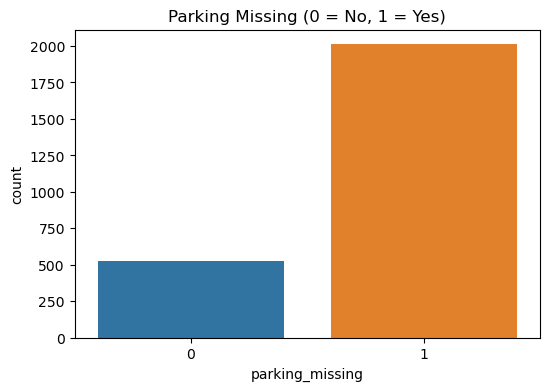

parking_missing
1    79.400158
0    20.599842
Name: proportion, dtype: float64


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='parking_missing', data=new_data)
plt.title("Parking Missing (0 = No, 1 = Yes)")
plt.show()

# Percentages
print(new_data['parking_missing'].value_counts(normalize=True)*100)


Numeric Summary Statistics:

             FLOOR      BEDROOM     BATHROOM  price_in_crore  Land_in_aana  \
count  2534.000000  2534.000000  2534.000000     2534.000000   2534.000000   
mean      2.676559     5.325178     4.073796        3.999211      4.897257   
std       0.704665     2.245674     1.679772        2.764535      2.730525   
min       1.000000     1.000000     1.000000        0.980000      0.300000   
25%       2.500000     4.000000     3.000000        2.500000      3.200000   
50%       2.500000     5.000000     4.000000        3.235000      4.000000   
75%       3.000000     6.000000     5.000000        4.500000      5.200000   
max       8.000000    36.000000    34.000000       40.000000     26.000000   

       LAND_squared  road_access_in_feet          AGE  car_parking  \
count   2534.000000          2534.000000  2534.000000  2534.000000   
mean      31.435956            14.854736     9.728493     0.309392   
std       47.541760             4.343998     6.116232     

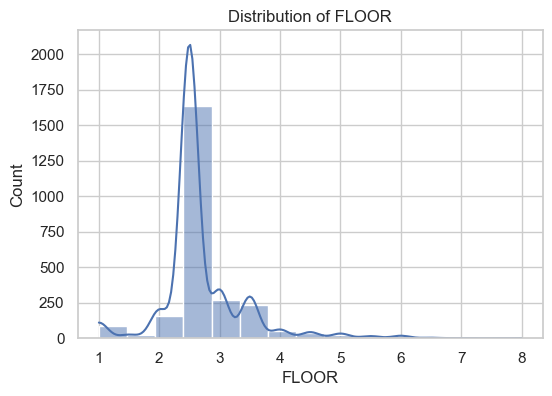

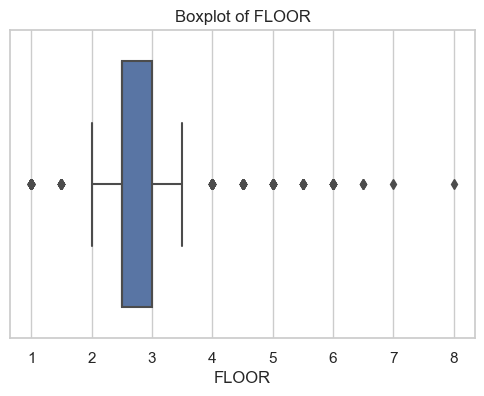

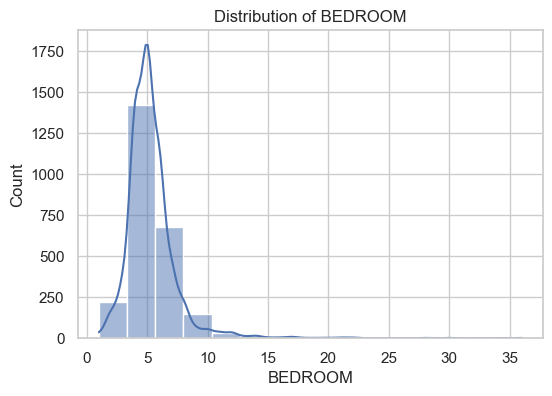

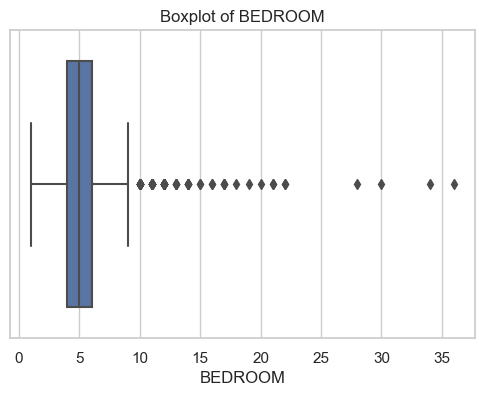

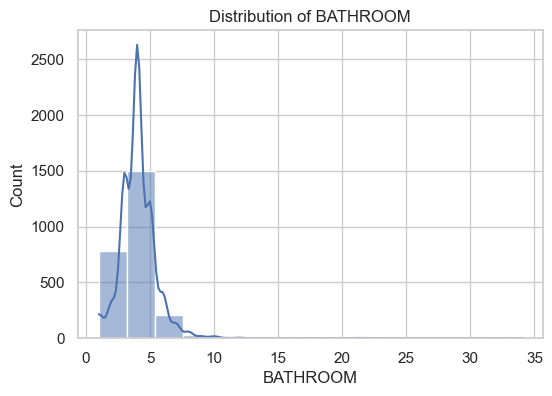

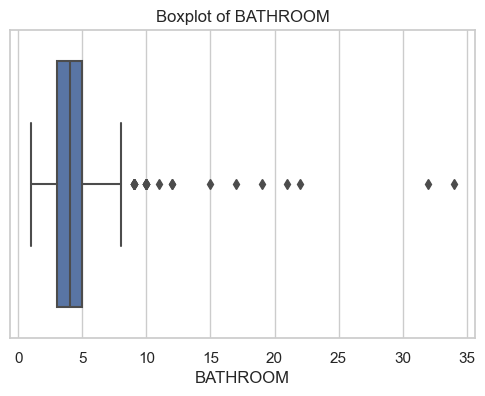

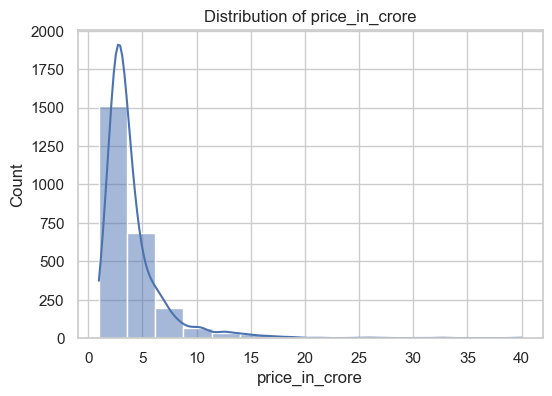

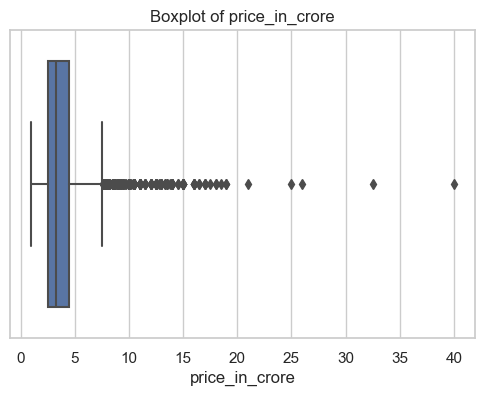

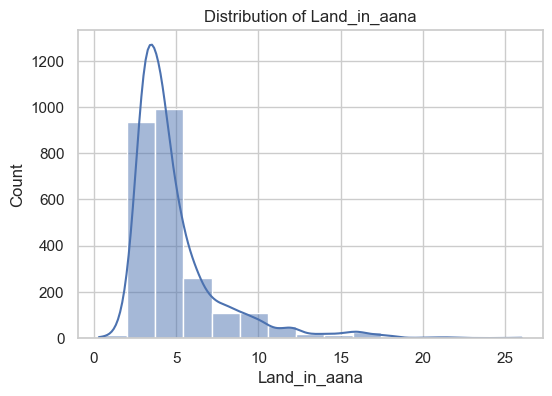

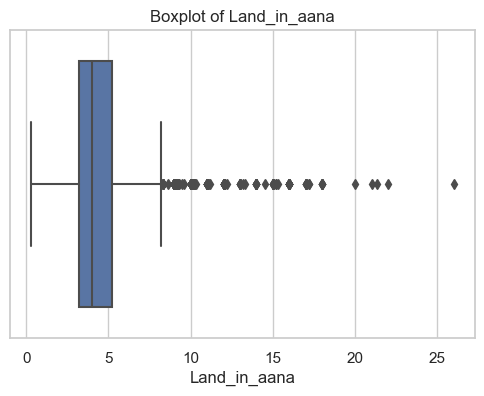

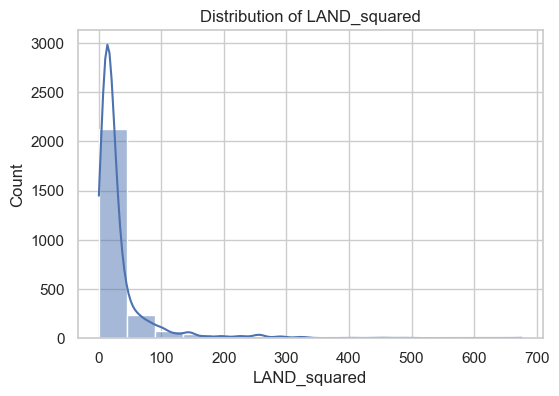

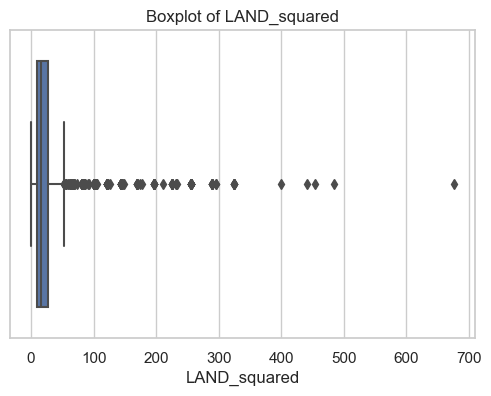

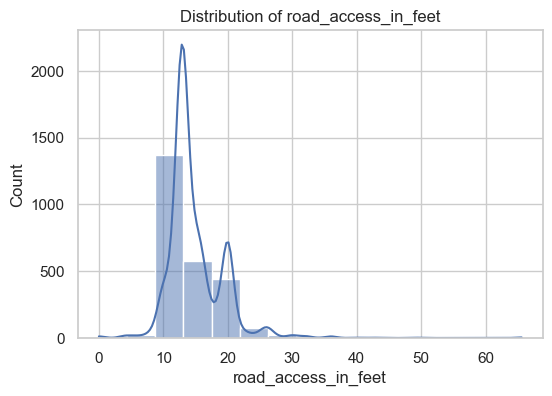

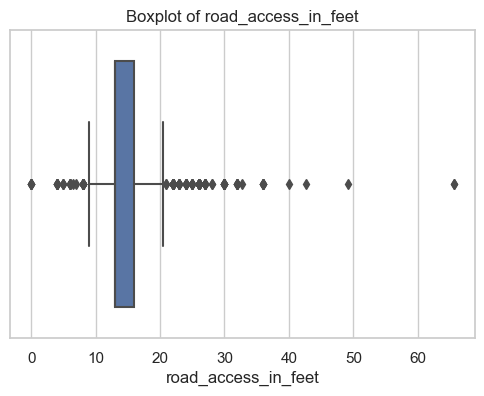

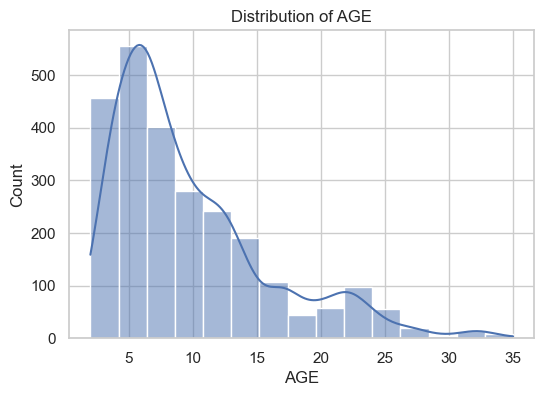

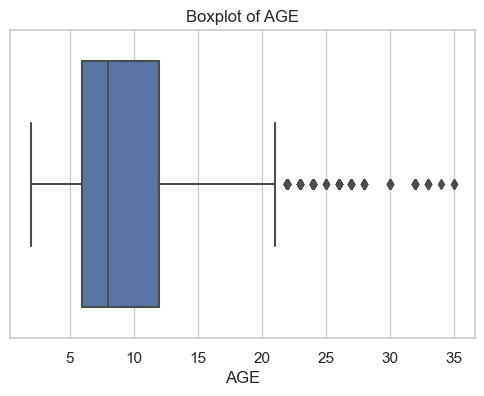

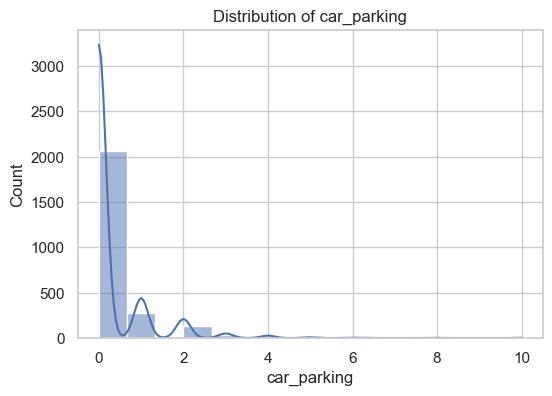

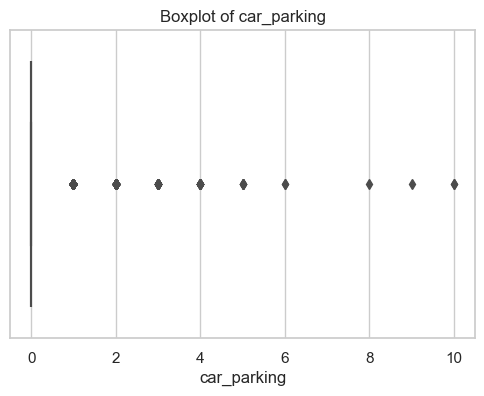

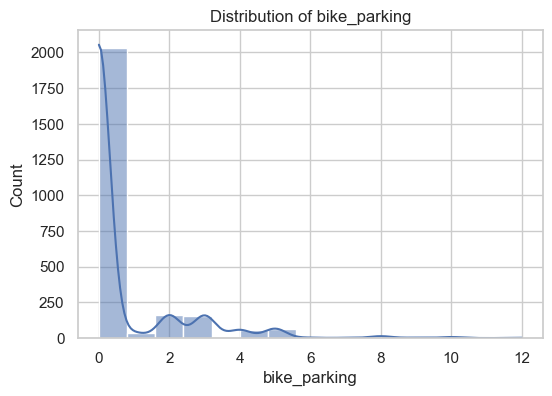

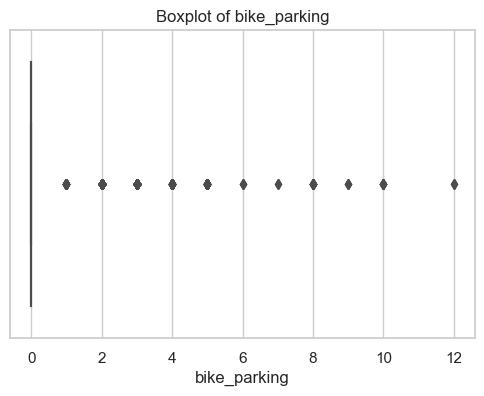

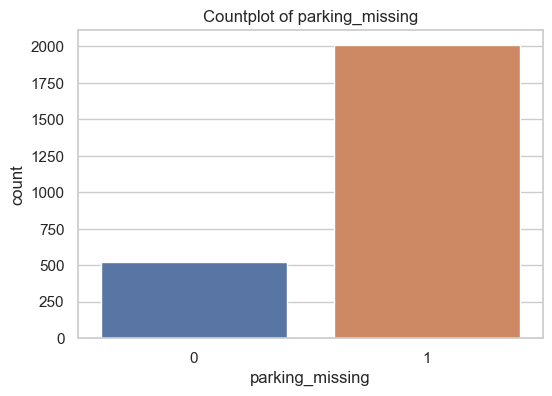


Percentages in parking_missing:
 parking_missing
1    79.400158
0    20.599842
Name: proportion, dtype: float64


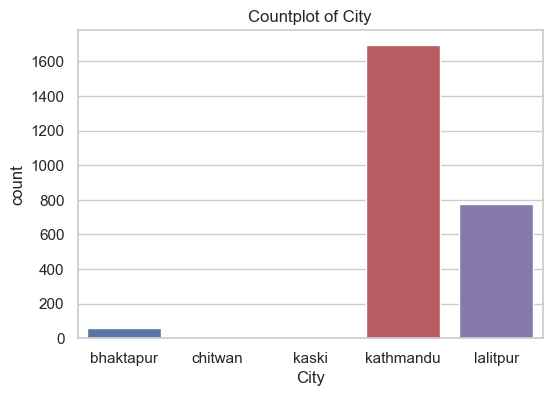


Percentages in City:
 City
kathmandu    66.929755
lalitpur     30.584057
bhaktapur     2.209945
kaski         0.236780
chitwan       0.039463
Name: proportion, dtype: float64


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: nicer plots
sns.set(style="whitegrid")

# Separate numeric and categorical columns
numeric_cols = ['FLOOR', 'BEDROOM', 'BATHROOM', 'price_in_crore',
                'Land_in_aana', 'LAND_squared', 'road_access_in_feet',
                'AGE', 'car_parking', 'bike_parking']

categorical_cols = ['parking_missing', 'City']

# -----------------------------
# 1️⃣ Summary statistics
print("Numeric Summary Statistics:\n")
print(new_data[numeric_cols].describe())

print("\nCategorical Value Counts:\n")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(new_data[col].value_counts())

# -----------------------------
# 2️⃣ Numeric Columns Visualization
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    
    # Histogram + KDE
    sns.histplot(new_data[col], kde=True, bins=15)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # Boxplot to check outliers
    plt.figure(figsize=(6,4))
    sns.boxplot(x=new_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# -----------------------------
# 3️⃣ Categorical Columns Visualization
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=new_data[col])
    plt.title(f"Countplot of {col}")
    plt.show()
    
    # Print percentages
    print(f"\nPercentages in {col}:\n", new_data[col].value_counts(normalize=True)*100)


{'kathmandu': 1696, 'lalitpur': 775, 'bhaktapur': 56, 'kaski': 6, 'chitwan': 1}


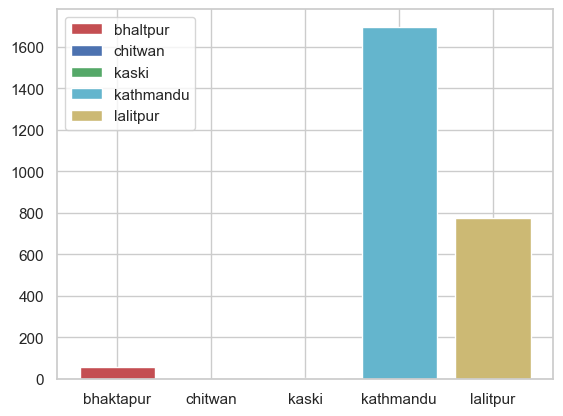

In [58]:
plot_data = dict(new_data['City'].value_counts())
print(plot_data)
plt.bar(['bhaktapur','chitwan','kaski','kathmandu','lalitpur'], [ plot_data['bhaktapur'], plot_data['chitwan'],plot_data['kaski'],plot_data['kathmandu'],plot_data['lalitpur']], color = ['r','b','g','c','y'], label = ['bhaltpur', 'chitwan','kaski','kathmandu','lalitpur'])
plt.legend()
plt.show()

<Axes: xlabel='City'>

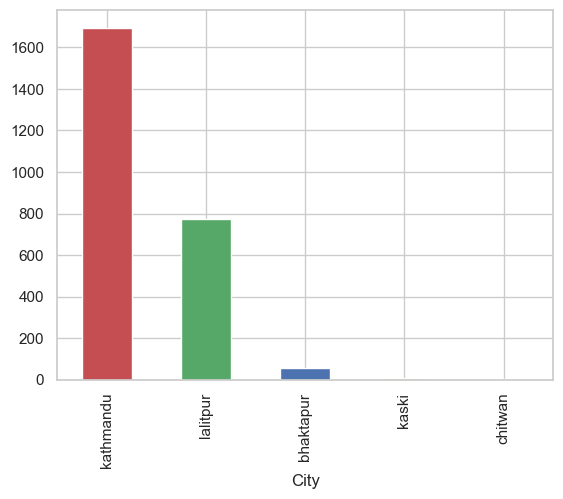

In [59]:
new_data['City'].value_counts().plot.bar(color = ['r', 'g', 'b','y','c'])

<Axes: xlabel='parking_missing'>

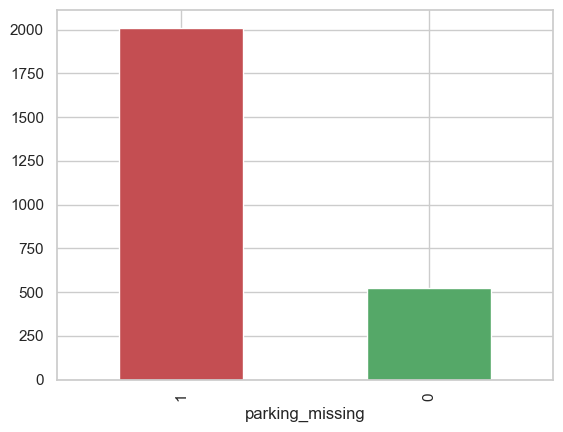

In [60]:
new_data['parking_missing'].value_counts().plot.bar(color = ['r', 'g', 'b'])

<Axes: ylabel='count'>

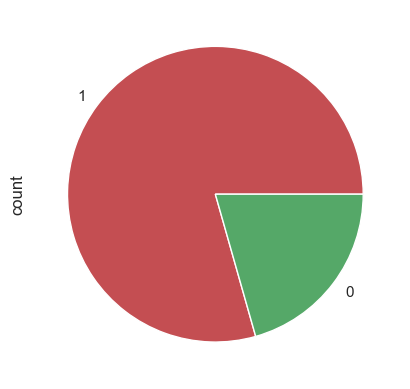

In [61]:
new_data['parking_missing'].value_counts().plot.pie(colors = ['r', 'g'])

<Axes: ylabel='count'>

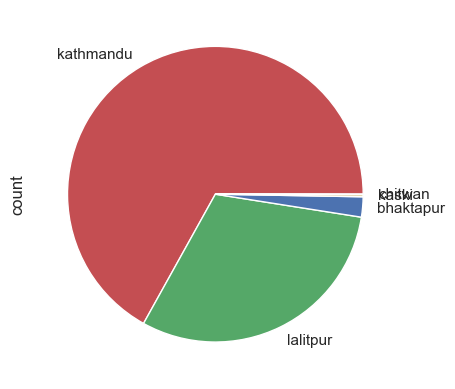

In [62]:
new_data['City'].value_counts().plot.pie(colors = ['r', 'g', 'b','y','c'])

{'kathmandu': 1696, 'lalitpur': 775, 'bhaktapur': 56, 'kaski': 6, 'chitwan': 1}
dict_keys(['kathmandu', 'lalitpur', 'bhaktapur', 'kaski', 'chitwan'])
dict_values([1696, 775, 56, 6, 1])


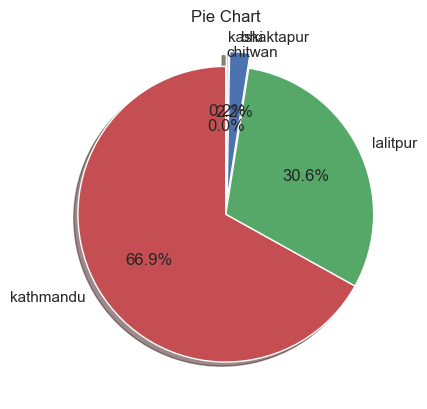

In [63]:
import matplotlib.pyplot as plt
plot_data = dict(new_data['City'].value_counts())
print(plot_data)
print(plot_data.keys())
print(plot_data.values())

slices = plot_data.values()
activities = plot_data.keys()
cols = ['r','g','b','y','c']

plt.pie(slices, 
        labels = activities,
        colors = cols,
        startangle = 90,
        shadow = True,
        explode = (0,0,0.1,0.1,0),
        autopct = '%1.1f%%')
plt.title('Pie Chart')
plt.show()

In [64]:
new_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,AGE,car_parking,bike_parking
0,3.0,5.0,4.0,0,2.90,4.0,16.00,lalitpur,12.0,6,1,2
1,4.5,5.0,6.0,0,4.75,3.0,9.00,lalitpur,10.0,6,2,2
2,2.5,4.0,4.0,0,1.99,2.3,5.29,lalitpur,10.0,22,1,3
3,2.5,4.0,3.0,0,4.00,7.0,49.00,lalitpur,12.0,23,4,4
4,2.0,4.0,4.0,0,1.20,6.0,36.00,kathmandu,20.0,11,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,20.25,kathmandu,16.0,6,1,3
3414,3.0,3.0,3.0,0,3.00,4.5,20.25,kathmandu,16.0,6,1,3
3415,2.5,4.0,2.0,0,1.60,4.7,22.09,kathmandu,16.0,10,1,3
3416,2.5,5.0,3.0,0,3.50,6.3,39.69,kathmandu,16.0,5,2,7


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

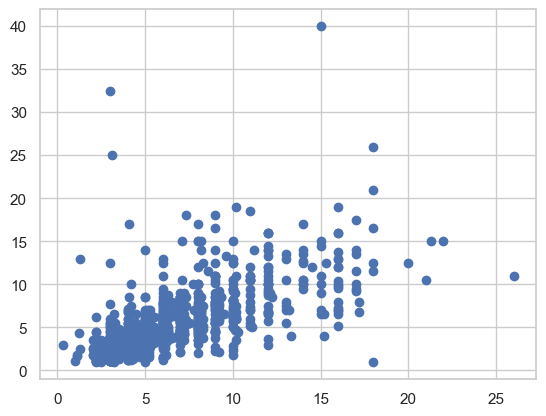

In [65]:
#scatter plot
import pandas as pd
from matplotlib import pyplot as plt
x = new_data['Land_in_aana']
y = new_data['price_in_crore']
plt.scatter(x,y)
plt.plot

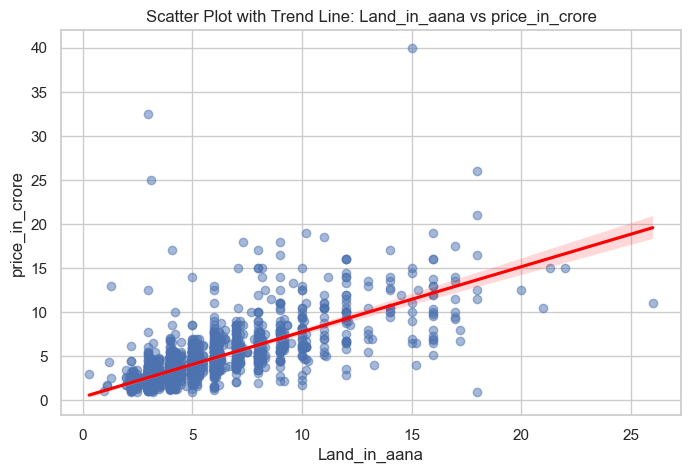

In [66]:
def plot_scatter_with_trend(data, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Trend Line: {x_col} vs {y_col}')
    plt.grid(True)
    plt.show()

# Example usage
plot_scatter_with_trend(new_data, 'Land_in_aana', 'price_in_crore')

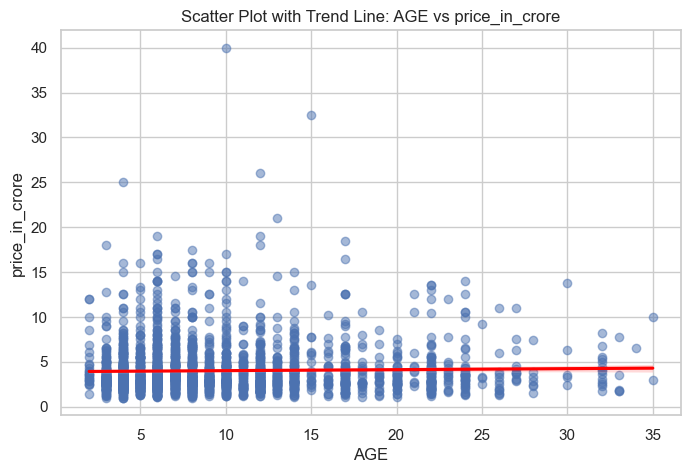

In [67]:
def plot_scatter_with_trend(data, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Trend Line: {x_col} vs {y_col}')
    plt.grid(True)
    plt.show()

# Example usage
plot_scatter_with_trend(new_data, 'AGE', 'price_in_crore')

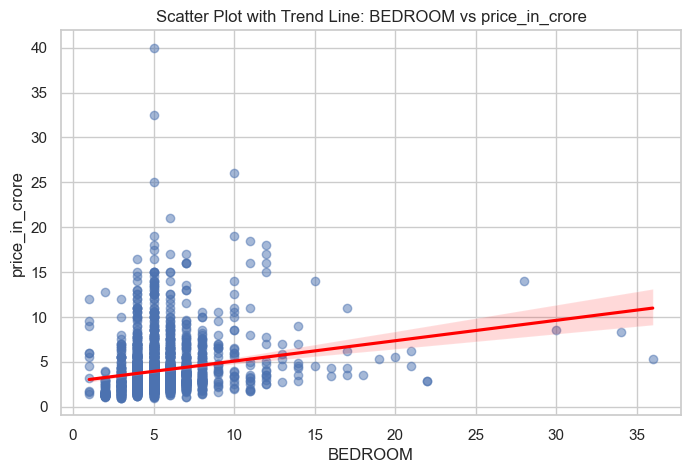

In [68]:
def plot_scatter_with_trend(data, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Trend Line: {x_col} vs {y_col}')
    plt.grid(True)
    plt.show()

# Example usage
plot_scatter_with_trend(new_data, 'BEDROOM', 'price_in_crore')

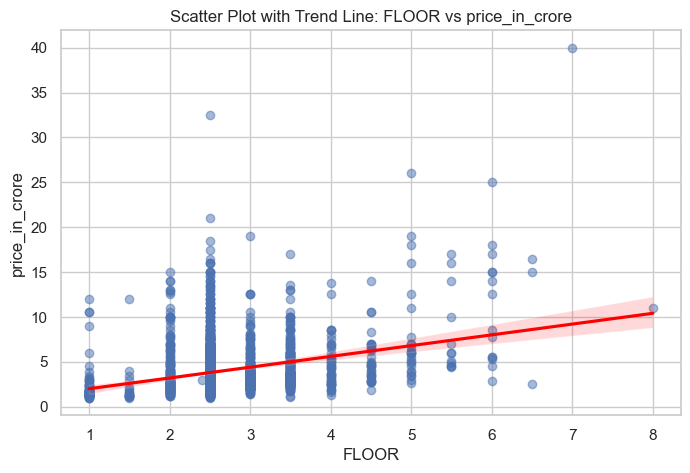

In [69]:
def plot_scatter_with_trend(data, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Trend Line: {x_col} vs {y_col}')
    plt.grid(True)
    plt.show()

# Example usage
plot_scatter_with_trend(new_data, 'FLOOR', 'price_in_crore')

AttributeError: 'int' object has no attribute 'startswith'

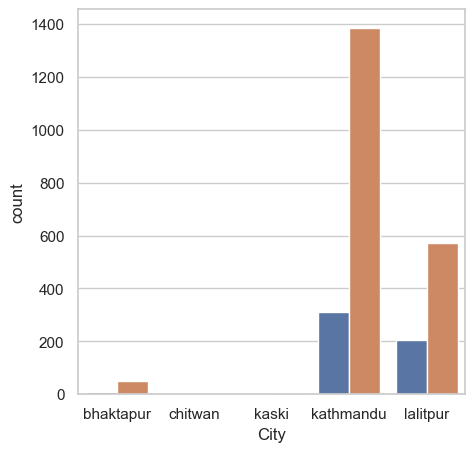

In [70]:
plt.figure(figsize = (5,5))
sns.countplot( x= 'City', hue = 'parking_missing', data = new_data)

<Axes: xlabel='City'>

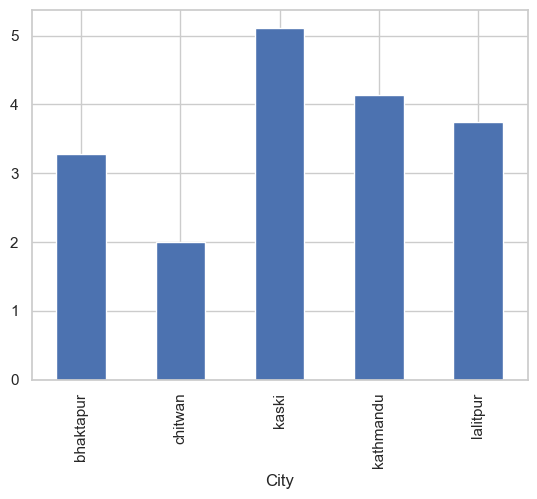

In [71]:
new_data.groupby(new_data['City']).price_in_crore.mean().plot.bar()

<Axes: xlabel='parking_missing'>

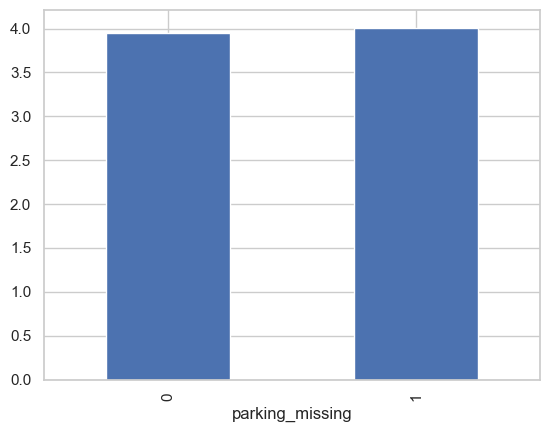

In [72]:
new_data.groupby(new_data['parking_missing']).price_in_crore.mean().plot.bar()

<Axes: ylabel='price_in_crore'>

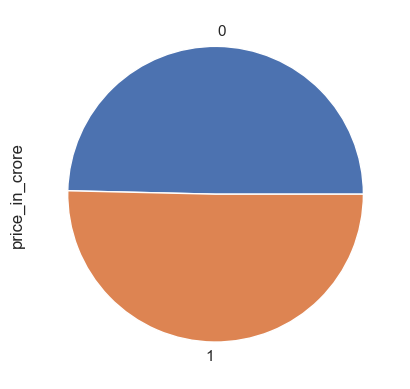

In [73]:
new_data.groupby(new_data['parking_missing']).price_in_crore.mean().plot.pie()

<Axes: ylabel='price_in_crore'>

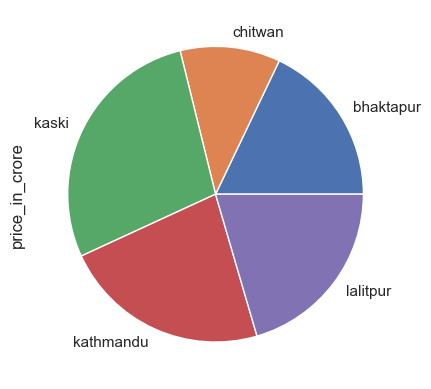

In [74]:
new_data.groupby(new_data['City']).price_in_crore.mean().plot.pie()

<Axes: xlabel='City'>

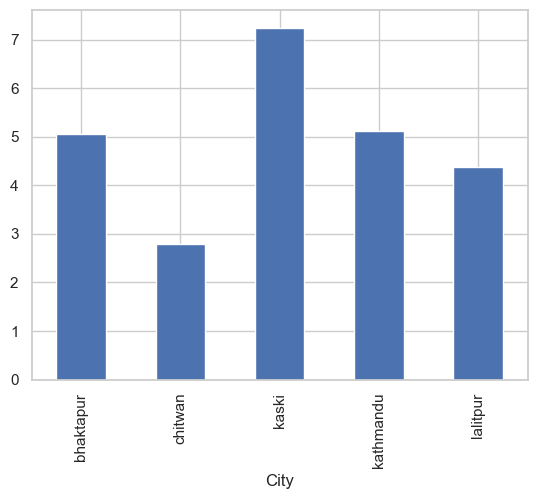

In [75]:
new_data.groupby(new_data['City']).Land_in_aana.mean().plot.bar()

<Axes: ylabel='Land_in_aana'>

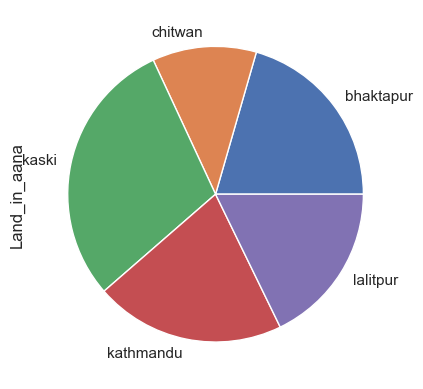

In [76]:
new_data.groupby(new_data['City']).Land_in_aana.mean().plot.pie()

[Text(0.5, 1.0, 'city vs price')]

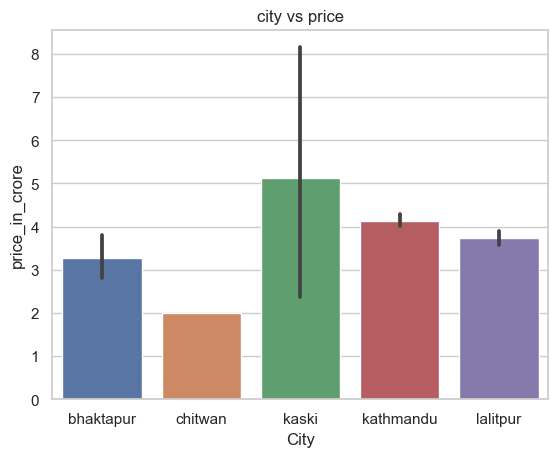

In [77]:
sns.barplot( x = new_data.City, y = new_data.price_in_crore).set(title = 'city vs price')

[Text(0.5, 1.0, 'parking_missing vs price')]

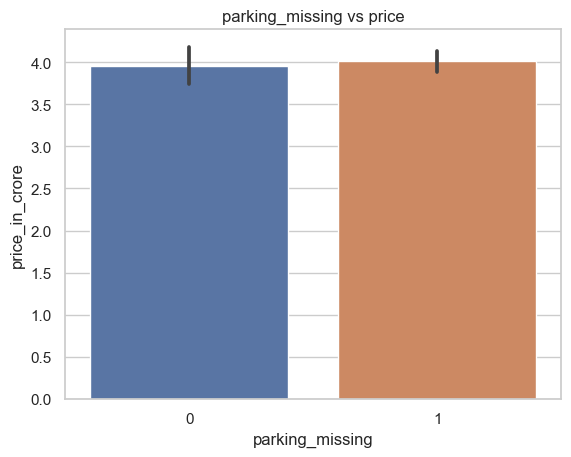

In [78]:
sns.barplot( x = new_data.parking_missing, y = new_data.price_in_crore).set(title = 'parking_missing vs price')

[Text(0.5, 1.0, 'city vs parking_missing vs price')]

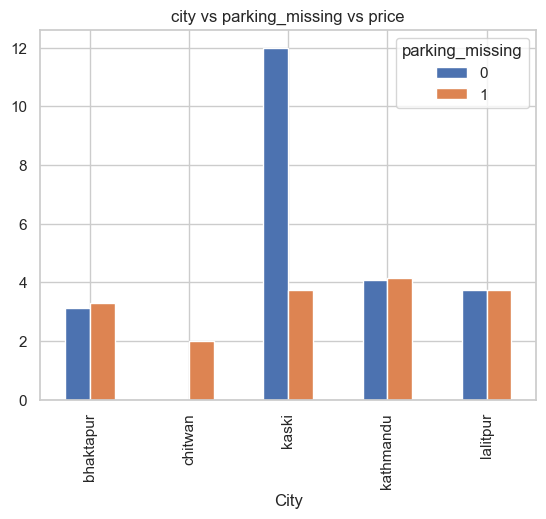

In [79]:
new_data.groupby(['City','parking_missing']).price_in_crore.mean().unstack().plot.bar().set(title = 'city vs parking_missing vs price')

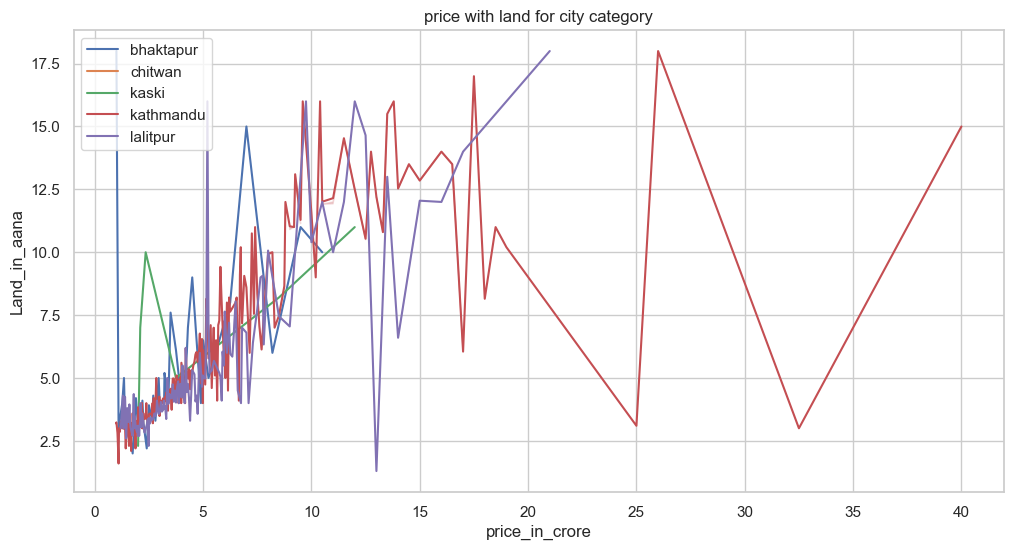

In [80]:
plt.figure(figsize = (12,6))
sns.lineplot( x = new_data['price_in_crore'], y = new_data['Land_in_aana'], hue = new_data['City'], ci = 1).set(title = 'price with land for city category')
plt.legend(loc = 'upper left')
plt.show()

In [81]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 0 to 3417
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   FLOOR                2534 non-null   float64 
 1   BEDROOM              2534 non-null   float64 
 2   BATHROOM             2534 non-null   float64 
 3   parking_missing      2534 non-null   category
 4   price_in_crore       2534 non-null   float64 
 5   Land_in_aana         2534 non-null   float64 
 6   LAND_squared         2534 non-null   float64 
 7   City                 2534 non-null   category
 8   road_access_in_feet  2534 non-null   float64 
 9   AGE                  2534 non-null   int32   
 10  car_parking          2534 non-null   int64   
 11  bike_parking         2534 non-null   int64   
dtypes: category(2), float64(7), int32(1), int64(2)
memory usage: 213.1 KB


Removing Outliers

In [149]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to include only non-outlier rows
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

new_data = remove_outliers(new_data, 'price_in_crore')

new_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,AGE,car_parking,bike_parking
0,3.0,5.0,4.0,0,2.90,4.0,16.00,lalitpur,12.0,6,1,2
1,4.5,5.0,6.0,0,4.75,3.0,9.00,lalitpur,10.0,6,2,2
2,2.5,4.0,4.0,0,1.99,2.3,5.29,lalitpur,10.0,22,1,3
3,2.5,4.0,3.0,0,4.00,7.0,49.00,lalitpur,12.0,23,4,4
4,2.0,4.0,4.0,0,1.20,6.0,36.00,kathmandu,20.0,11,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,20.25,kathmandu,16.0,6,1,3
3414,3.0,3.0,3.0,0,3.00,4.5,20.25,kathmandu,16.0,6,1,3
3415,2.5,4.0,2.0,0,1.60,4.7,22.09,kathmandu,16.0,10,1,3
3416,2.5,5.0,3.0,0,3.50,6.3,39.69,kathmandu,16.0,5,2,7


EDA for model building

In [150]:
clean_data = new_data[['FLOOR', 'BEDROOM', 'BATHROOM', 'parking_missing', 'price_in_crore',
       'Land_in_aana','LAND_squared','City','road_access_in_feet','AGE','car_parking','bike_parking']]

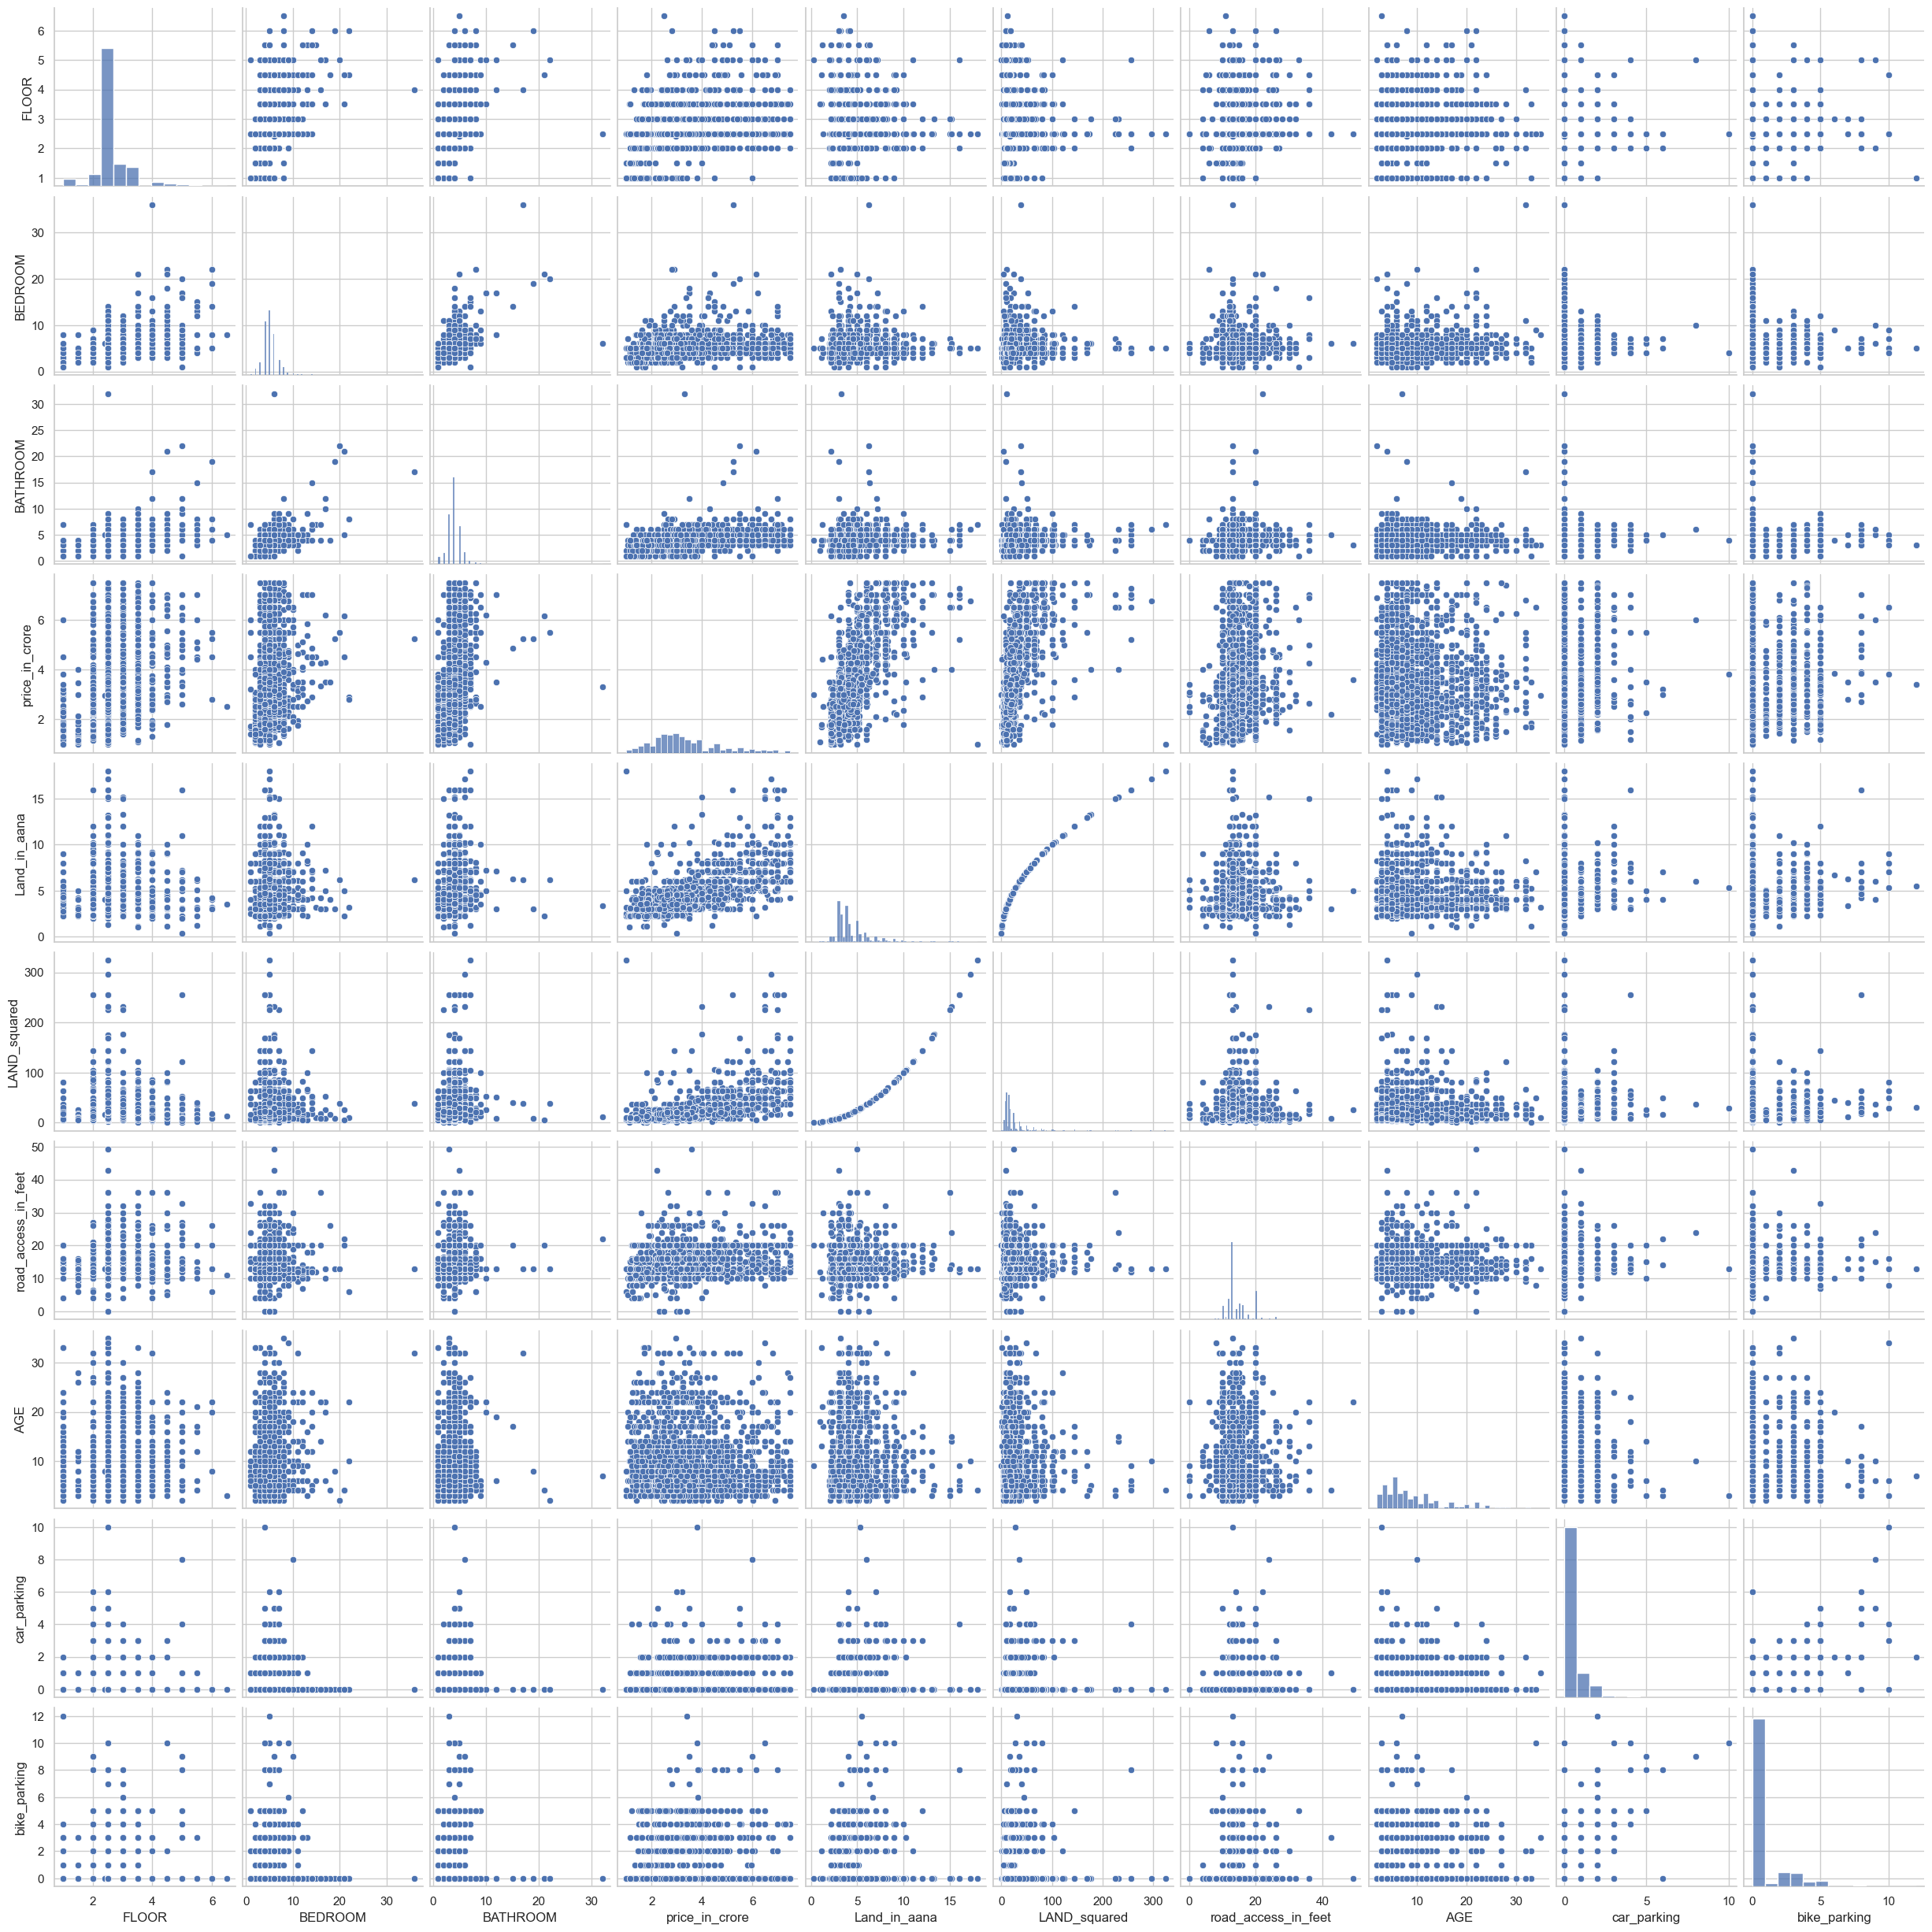

In [151]:
sns.pairplot(clean_data)

In [168]:
clean_data1=new_data[['FLOOR', 'BEDROOM', 'BATHROOM','price_in_crore',
       'Land_in_aana','LAND_squared','road_access_in_feet','AGE','car_parking','bike_parking']]
clean_data1.corr()

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,LAND_squared,road_access_in_feet,AGE,car_parking,bike_parking
FLOOR,1.000000,0.503906,0.416541,0.282487,0.047151,0.041158,0.081379,0.023466,0.025040,0.030786
BEDROOM,0.503906,1.000000,0.494244,0.195620,0.098493,0.069226,-0.016385,0.063777,0.031038,0.035760
BATHROOM,0.416541,0.494244,1.000000,0.340819,0.155059,0.123993,0.093361,0.012398,0.033821,0.012218
price_in_crore,0.282487,0.195620,0.340819,1.000000,0.672778,0.567941,0.193375,0.000840,0.094780,0.061346
Land_in_aana,0.047151,0.098493,0.155059,0.672778,1.000000,0.953591,0.072538,-0.004123,0.093926,0.044727
LAND_squared,0.041158,0.069226,0.123993,0.567941,0.953591,1.000000,0.056318,-0.013303,0.067843,0.029098
road_access_in_feet,0.081379,-0.016385,0.093361,0.193375,0.072538,0.056318,1.000000,0.030017,0.027790,0.008065
AGE,0.023466,0.063777,0.012398,0.000840,-0.004123,-0.013303,0.030017,1.000000,-0.088857,-0.086999
car_parking,0.025040,0.031038,0.033821,0.094780,0.093926,0.067843,0.027790,-0.088857,1.000000,0.800051
bike_parking,0.030786,0.035760,0.012218,0.061346,0.044727,0.029098,0.008065,-0.086999,0.800051,1.000000


Starting Machine Learning

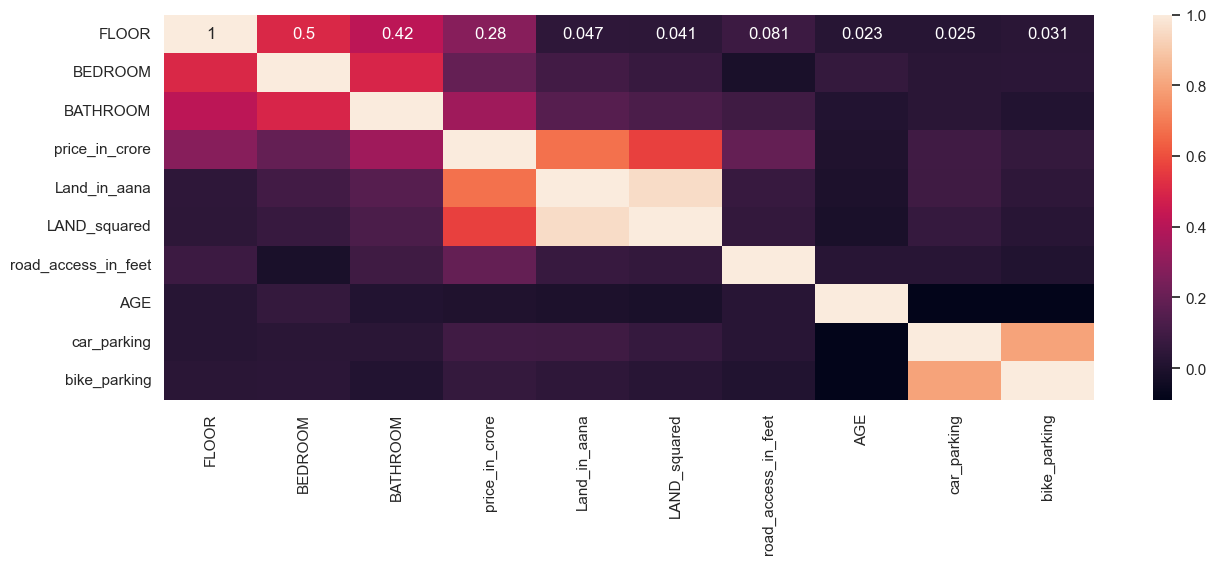

In [169]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(clean_data1.corr(),annot=True)
plt.show()

In [170]:
clean_data

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,2.90,4.0,12.0,6,1,False,False,False,False,True
1,4.5,5.0,6.0,4.75,3.0,10.0,6,2,False,False,False,False,True
2,2.5,4.0,4.0,1.99,2.3,10.0,22,1,False,False,False,False,True
3,2.5,4.0,3.0,4.00,7.0,12.0,23,4,False,False,False,False,True
4,2.0,4.0,4.0,1.20,6.0,20.0,11,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2.60,4.5,16.0,6,1,False,False,False,True,False
3414,3.0,3.0,3.0,3.00,4.5,16.0,6,1,False,False,False,True,False
3415,2.5,4.0,2.0,1.60,4.7,16.0,10,1,False,False,False,True,False
3416,2.5,5.0,3.0,3.50,6.3,16.0,5,2,False,False,False,True,False


Dimension Reduction

In [ ]:
clean_data['parking_missing'] = clean_data['parking_missing'].astype(int)

In [156]:
clean_data['parking_missing'].dtypes

dtype('int32')

In [157]:
City = pd.get_dummies(clean_data['City'])
City

,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,True,False
...,...,...,...,...,...
3413,False,False,False,True,False
3414,False,False,False,True,False
3415,False,False,False,True,False
3416,False,False,False,True,False


In [158]:
clean_data = pd.concat([clean_data, City], axis = 1)
clean_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,LAND_squared,City,road_access_in_feet,AGE,car_parking,bike_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,0,2.90,4.0,16.00,lalitpur,12.0,6,1,2,False,False,False,False,True
1,4.5,5.0,6.0,0,4.75,3.0,9.00,lalitpur,10.0,6,2,2,False,False,False,False,True
2,2.5,4.0,4.0,0,1.99,2.3,5.29,lalitpur,10.0,22,1,3,False,False,False,False,True
3,2.5,4.0,3.0,0,4.00,7.0,49.00,lalitpur,12.0,23,4,4,False,False,False,False,True
4,2.0,4.0,4.0,0,1.20,6.0,36.00,kathmandu,20.0,11,4,5,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,20.25,kathmandu,16.0,6,1,3,False,False,False,True,False
3414,3.0,3.0,3.0,0,3.00,4.5,20.25,kathmandu,16.0,6,1,3,False,False,False,True,False
3415,2.5,4.0,2.0,0,1.60,4.7,22.09,kathmandu,16.0,10,1,3,False,False,False,True,False
3416,2.5,5.0,3.0,0,3.50,6.3,39.69,kathmandu,16.0,5,2,7,False,False,False,True,False


In [159]:
clean_data = clean_data.drop(['LAND_squared','bike_parking','City'],axis = 1)
clean_data

,FLOOR,BEDROOM,BATHROOM,parking_missing,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,0,2.90,4.0,12.0,6,1,False,False,False,False,True
1,4.5,5.0,6.0,0,4.75,3.0,10.0,6,2,False,False,False,False,True
2,2.5,4.0,4.0,0,1.99,2.3,10.0,22,1,False,False,False,False,True
3,2.5,4.0,3.0,0,4.00,7.0,12.0,23,4,False,False,False,False,True
4,2.0,4.0,4.0,0,1.20,6.0,20.0,11,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,0,2.60,4.5,16.0,6,1,False,False,False,True,False
3414,3.0,3.0,3.0,0,3.00,4.5,16.0,6,1,False,False,False,True,False
3415,2.5,4.0,2.0,0,1.60,4.7,16.0,10,1,False,False,False,True,False
3416,2.5,5.0,3.0,0,3.50,6.3,16.0,5,2,False,False,False,True,False


In [172]:
clean_data.corr()

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
FLOOR,1.000000,0.503906,0.416541,0.282487,0.047151,0.081379,0.023466,0.025040,0.021764,-0.004722,-0.017593,0.038468,-0.044459
BEDROOM,0.503906,1.000000,0.494244,0.195620,0.098493,-0.016385,0.063777,0.031038,-0.002797,0.007687,0.005197,0.117363,-0.119643
BATHROOM,0.416541,0.494244,1.000000,0.340819,0.155059,0.093361,0.012398,0.033821,-0.030697,-0.026781,-0.013174,0.034333,-0.022790
price_in_crore,0.282487,0.195620,0.340819,1.000000,0.672778,0.193375,0.000840,0.094780,-0.050230,-0.020536,-0.024782,0.067636,-0.049731
Land_in_aana,0.047151,0.098493,0.155059,0.672778,1.000000,0.072538,-0.004123,0.093926,0.033605,-0.017537,0.036189,0.122323,-0.138041
road_access_in_feet,0.081379,-0.016385,0.093361,0.193375,0.072538,1.000000,0.030017,0.027790,0.025716,0.001553,-0.007181,-0.084884,0.078906
AGE,0.023466,0.063777,0.012398,0.000840,-0.004123,0.030017,1.000000,-0.088857,-0.030083,-0.019316,-0.035249,0.017243,-0.003916
car_parking,0.025040,0.031038,0.033821,0.094780,0.093926,0.027790,-0.088857,1.000000,-0.017415,-0.008187,-0.016384,-0.011761,0.019423
bhaktapur,0.021764,-0.002797,-0.030697,-0.050230,0.033605,0.025716,-0.030083,-0.017415,1.000000,-0.003148,-0.006299,-0.214052,-0.102303
chitwan,-0.004722,0.007687,-0.026781,-0.020536,-0.017537,0.001553,-0.019316,-0.008187,-0.003148,1.000000,-0.000856,-0.029074,-0.013895


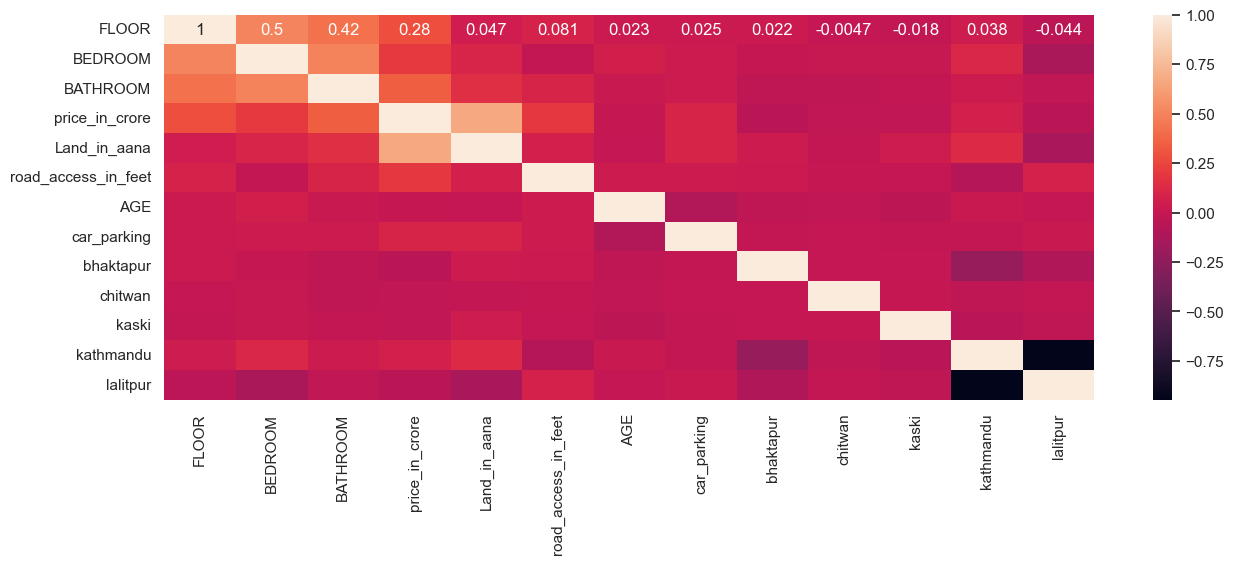

In [173]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(clean_data.corr(),annot=True)
plt.show()

In [162]:
clean_data.drop('parking_missing', axis=1, inplace=True)
clean_data

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,2.90,4.0,12.0,6,1,False,False,False,False,True
1,4.5,5.0,6.0,4.75,3.0,10.0,6,2,False,False,False,False,True
2,2.5,4.0,4.0,1.99,2.3,10.0,22,1,False,False,False,False,True
3,2.5,4.0,3.0,4.00,7.0,12.0,23,4,False,False,False,False,True
4,2.0,4.0,4.0,1.20,6.0,20.0,11,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2.60,4.5,16.0,6,1,False,False,False,True,False
3414,3.0,3.0,3.0,3.00,4.5,16.0,6,1,False,False,False,True,False
3415,2.5,4.0,2.0,1.60,4.7,16.0,10,1,False,False,False,True,False
3416,2.5,5.0,3.0,3.50,6.3,16.0,5,2,False,False,False,True,False


In [174]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(clean_data, train_size = 0.85, test_size = 0.15, random_state = 1)

In [175]:
df_train

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
849,2.5,4.0,4.0,3.25,4.0,20.0,10,0,False,False,False,True,False
1491,2.5,6.0,3.0,4.50,6.1,12.0,6,0,False,False,False,False,True
1345,2.5,5.0,4.0,2.85,4.0,13.5,3,0,False,False,False,True,False
100,2.0,4.0,2.0,1.60,2.2,13.0,7,0,False,False,False,False,True
1973,2.5,4.0,4.0,2.30,3.1,13.0,4,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2.5,4.0,4.0,3.95,5.0,13.0,10,0,False,False,False,False,True
1343,2.5,6.0,2.0,2.50,3.2,13.0,10,0,False,False,False,True,False
1645,2.5,5.0,5.0,4.25,5.0,15.0,9,0,False,False,False,True,False
288,2.5,4.0,4.0,2.95,4.2,13.0,10,2,False,False,False,True,False


In [176]:
df_test

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
3333,3.5,6.0,4.0,3.05,4.0,26.0,8,2,False,False,False,True,False
2528,2.5,6.0,3.0,2.50,4.0,13.0,20,0,True,False,False,False,False
1885,2.5,4.0,4.0,3.20,3.3,16.5,6,0,False,False,False,False,True
1699,2.5,4.0,4.0,4.30,5.1,15.0,4,0,False,False,False,False,True
236,3.0,5.0,4.0,3.10,4.0,13.0,10,2,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.0,3.0,1.0,1.30,3.2,13.0,6,0,False,False,False,True,False
1825,2.5,5.0,3.0,1.70,3.3,10.0,32,0,False,False,False,True,False
3015,2.5,5.0,4.0,2.05,3.1,12.0,4,0,False,False,False,True,False
1476,2.5,11.0,5.0,3.15,4.0,13.0,9,0,False,False,False,True,False


In [177]:
df_train.shape

(1989, 13)

In [178]:
df_test.shape

(351, 13)

In [179]:
X_train = df_train[['FLOOR','BEDROOM','BATHROOM','Land_in_aana','road_access_in_feet','AGE','car_parking','bhaktapur','chitwan','kaski','kathmandu','lalitpur']]

y_train = df_train['price_in_crore']

Using Regression

In [180]:
# # for linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

# #for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
# #-----------------------------------------
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

In [194]:
auto = clean_data.iloc[800:801]
auto

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
1151,2.5,4.0,4.0,3.25,3.3,13.0,6,0,False,False,False,False,True


In [195]:
actual_price = auto['price_in_crore']
auto = auto.drop(['price_in_crore'],axis = 1)
auto

,FLOOR,BEDROOM,BATHROOM,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
1151,2.5,4.0,4.0,3.3,13.0,6,0,False,False,False,False,True


Linear Model to compare the price 

In [183]:
#linear model
print("Predicted Price",lr_model.predict(auto))
print("Actual Price",actual_price)

Predicted Price [2.8425977]
Actual Price 1151    3.25
Name: price_in_crore, dtype: float64


Polynomial Model to compare the price

In [184]:
# # # # # # # #polynomial regression model test
predicted_price = pol_reg.predict(poly_reg.fit_transform(auto))
print("Actual Price",actual_price)
print("predicted Price",predicted_price)

Actual Price 1151    3.25
Name: price_in_crore, dtype: float64
predicted Price [2.85897041]


Checking Train Accuracy

In [205]:
#train acc
print("Linear regression = ",round(lr_model.score(X_train, y_train)*100,2))
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)

Linear regression =  55.9
Polynomial regression =  69.05989167631175


Checking Test Accuracy

In [204]:
#test acc
test_data = df_test
y_test = test_data['price_in_crore']
X_test = test_data.drop(['price_in_crore'],axis = 1)

print("Linear regression = ",round(lr_model.score(X_test, y_test)*100,2))
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_test), y_test)*100)



Linear regression =  57.28
Polynomial regression =  52.53839960697528


Feature Scaling

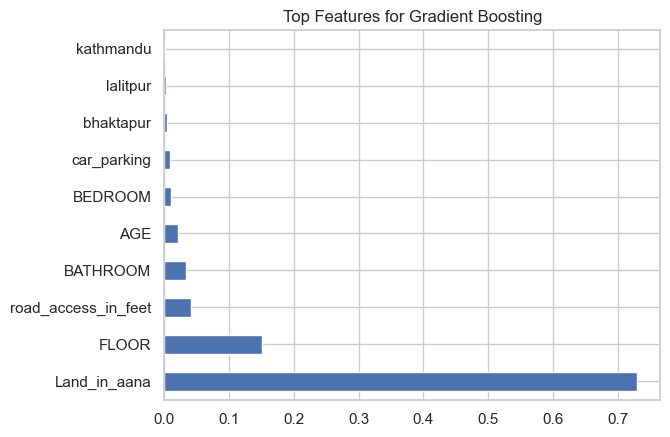

In [145]:
import matplotlib.pyplot as plt
feat_importance = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top Features for Gradient Boosting')
plt.show()


In [193]:
# ---------------------------
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  
lasso_model = lasso.fit(X_train, y_train)

# ---------------------------
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  
ridge_model = ridge.fit(X_train, y_train)

# ---------------------------
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model = rf.fit(X_train, y_train)

# ---------------------------
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  
gb_model = gb.fit(X_train, y_train)


In [196]:
#Ridge Regression
print("Predicted Price",ridge_model.predict(auto))
print("Actual Price",actual_price)

Predicted Price [2.84172913]
Actual Price 1151    3.25
Name: price_in_crore, dtype: float64


In [197]:
#lasso model
print("Predicted Price",lasso_model.predict(auto))
print("Actual Price",actual_price)

Predicted Price [2.81946379]
Actual Price 1151    3.25
Name: price_in_crore, dtype: float64


In [199]:
#Random forest model
print("Predicted Price",rf_model.predict(auto))
print("Actual Price",actual_price)

Predicted Price [3.365]
Actual Price 1151    3.25
Name: price_in_crore, dtype: float64


In [200]:
#Gradient Boosting Regressor
print("Predicted Price",gb_model.predict(auto))
print("Actual Price",actual_price)

Predicted Price [2.91899082]
Actual Price 1151    3.25
Name: price_in_crore, dtype: float64


In [207]:
#train acc for lasso, ridge, random forest, gradient regression
print("Lasso Regression = ",round(lasso_model.score(X_train, y_train)*100,2))
print("Ridge Regression = ",round(ridge_model.score(X_train, y_train)*100))
print("RandomForest Regression = ",round(rf_model.score(X_train, y_train)*100,2))
print("Gradient Boosting Regression = ",round(gb_model.score(X_train, y_train)*100))

Lasso Regression =  53.37
Ridge Regression =  56
RandomForest Regression =  94.07
Gradient Boosting Regression =  71


In [212]:
#test acc for lasso, ridge, random forest, gradient regression
test_data = df_test
y_test = test_data['price_in_crore']
X_test = test_data.drop(['price_in_crore'],axis = 1)

print("Lasso Regression = ",round(lasso_model.score(X_test, y_test)*100,2))
print("Ridge Regression = ",round(ridge.score(X_test, y_test)*100))
print("RandomForest Regression = ",round(rf_model.score(X_test, y_test)*100,2))
print("Gradient Boosting Regression = ",round(gb_model.score(X_test, y_test)*100))

Lasso Regression =  54.52
Ridge Regression =  57
RandomForest Regression =  60.6
Gradient Boosting Regression =  62


In [235]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------
# Prepare data
X = clean_data.drop(['price_in_crore'], axis=1)
y = clean_data['price_in_crore']



# Optional: log transform target to reduce skewness
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# ---------------------------
# Tuned RandomForest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf_model = rf.fit(X_train, y_train)

# # Predict and inverse log
# rf_preds = np.expm1(rf_model.predict(X_test))
# y_test_original = np.expm1(y_test)

# print("RandomForest R2:", round(r2_score(y_test_original, rf_preds)*100,2))
# print("RandomForest RMSE:", round(np.sqrt(mean_squared_error(y_test_original, rf_preds)),2))

# ---------------------------
# Tuned Gradient Boosting Regressor
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    min_samples_leaf=3,
    random_state=42
)
gb_model = gb.fit(X_train, y_train)

# # Predict and inverse log
# gb_preds = np.expm1(gb_model.predict(X_test))

# print("GradientBoosting R2:", round(r2_score(y_test_original, gb_preds)*100,2))
# print("GradientBoosting RMSE:", round(np.sqrt(mean_squared_error(y_test_original, gb_preds)),2))


In [242]:
#Train acc
print("RandomForest Regression = ",round(rf_model.score(X_train, y_train)*100,2))
print("Gradient Boosting Regression = ",round(gb_model.score(X_train, y_train)*100))

RandomForest Regression =  69.41
Gradient Boosting Regression =  79


In [247]:
#test acc
print("RandomForest Regression = ",round(rf_model.score(X_test, y_test)*100,2))
print("Gradient Boosting Regression = ",round(gb_model.score(X_test, y_test)*100))

RandomForest Regression =  65.47
Gradient Boosting Regression =  64


In [244]:
# #to dump model
import pickle as pk
filename = 'linear_model.pickle'
pk.dump(lr_model, open(filename, 'wb'))

In [245]:
# #to dump model
import pickle as pk
filename = 'lasso_model.pickle'
pk.dump(lasso_model, open(filename, 'wb'))

# #to dump model
import pickle as pk
filename = 'ridge_model.pickle'
pk.dump(ridge_model, open(filename, 'wb'))

# #to dump model
import pickle as pk
filename = 'RandomForest_model.pickle'
pk.dump(rf_model, open(filename, 'wb'))

# #to dump model
import pickle as pk
filename = 'GradientBoosting_model.pickle'
pk.dump(gb_model, open(filename, 'wb'))


In [248]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2340 entries, 0 to 3417
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLOOR                2340 non-null   float64
 1   BEDROOM              2340 non-null   float64
 2   BATHROOM             2340 non-null   float64
 3   price_in_crore       2340 non-null   float64
 4   Land_in_aana         2340 non-null   float64
 5   road_access_in_feet  2340 non-null   float64
 6   AGE                  2340 non-null   int32  
 7   car_parking          2340 non-null   int64  
 8   bhaktapur            2340 non-null   bool   
 9   chitwan              2340 non-null   bool   
 10  kaski                2340 non-null   bool   
 11  kathmandu            2340 non-null   bool   
 12  lalitpur             2340 non-null   bool   
dtypes: bool(5), float64(6), int32(1), int64(1)
memory usage: 166.8 KB


In [250]:
# print(data)
floor = [float(input("Enter floor = ")) for i in range(1)]
bedroom = [float(input("Enter no of bedroom = ")) for i in range(1)]
bathroom = [float(input("Enter no of bathroom = ")) for i in range(1)]
land = [float(input("Enter land in aana = ")) for i in range(1)]
road_access = [float(input("Enter road access in feet  = ")) for i in range(1)]
age = [int(input("Enter age of the house = ")) for i in range(1)]
car_parking = [int(input("Enter no of car parking = ")) for i in range(1)]
bhaktapur = [int(input("Enter 1 for bhaktapur otherwise 0  = ")) for i in range(1)]
chitwan = [int(input("Enter 1 chitwan otherwise 0 = ")) for i in range(1)]
kaski  = [int(input("Enter 1 kaski otherwise 0 = ")) for i in range(1)]
kathmandu = [int(input("Enter 1 kathmandu otherwise 0 = ")) for i in range(1)]
lalitpur  = [int(input("Enter 1 lalitpur otherwise 0 = ")) for i in range(1)]
df = pd.DataFrame({'FLOOR':floor,'BEDROOM':bedroom,'BATHROOM':bathroom,'Land_in_aana':land, 'road_access_in_feet':road_access,'AGE':age,'car_parking':car_parking,'bhaktapur':bhaktapur,'chitwan':chitwan,'kaski':kaski,'kathmandu':kathmandu,'lalitpur':lalitpur})
print(df)

predicted_salary = lr_model.predict(df)
# # print("Actual Salary",actual_salary)
# print("predicted Salary",np.round(predicted_salary,2))
print(round(predicted_salary[0],0))

Enter floor =  4
Enter no of bedroom =  13
Enter no of bathroom =  6
Enter land in aana =  10
Enter road access in feet  =  13
Enter age of the house =  5
Enter no of car parking =  3
Enter 1 for bhaktapur otherwise 0  =  0
Enter 1 chitwan otherwise 0 =  0
Enter 1 kaski otherwise 0 =  0
Enter 1 kathmandu otherwise 0 =  0
Enter 1 lalitpur otherwise 0 =  1


   FLOOR  BEDROOM  BATHROOM  Land_in_aana  road_access_in_feet  AGE  \
0    4.0     13.0       6.0          10.0                 13.0    5   

   car_parking  bhaktapur  chitwan  kaski  kathmandu  lalitpur  
0            3          0        0      0          0         1  
7.0


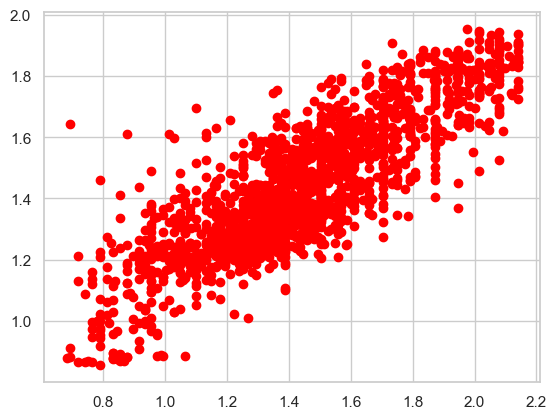

In [255]:
plt.scatter(y_train,rf_model.predict(X_train),color = 'red')


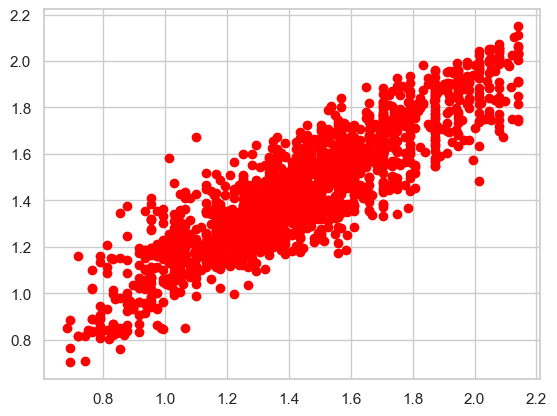

In [256]:
plt.scatter(y_train,gb_model.predict(X_train),color = 'red')


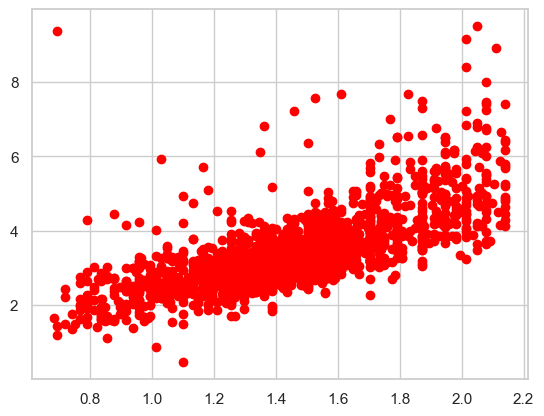

In [257]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')


Visulaization of Linear vs Random Forest vs Gradient Boost regression

In [261]:
# i have trained Linear Regression as:
# lr_model = lr.fit(X_train, y_train)

# For linear regression
y_pred_lr = lr_model.predict(X_test)

# For Random Forest
y_pred_rf = rf_model.predict(X_test)

# For Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# If you used log-transform on target, convert back
y_test_original = np.expm1(y_test)         # actual values
y_pred_lr = np.expm1(y_pred_lr)
y_pred_rf = np.expm1(y_pred_rf)
y_pred_gb = np.expm1(y_pred_gb)


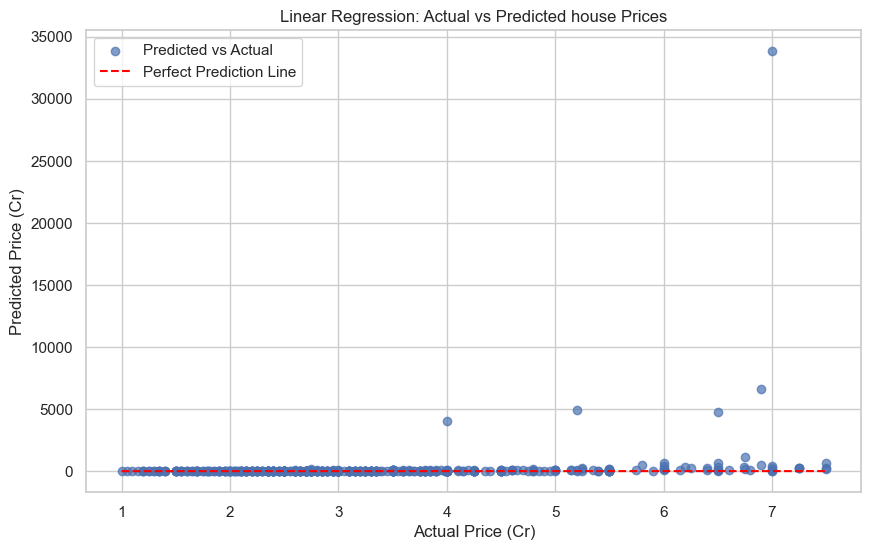

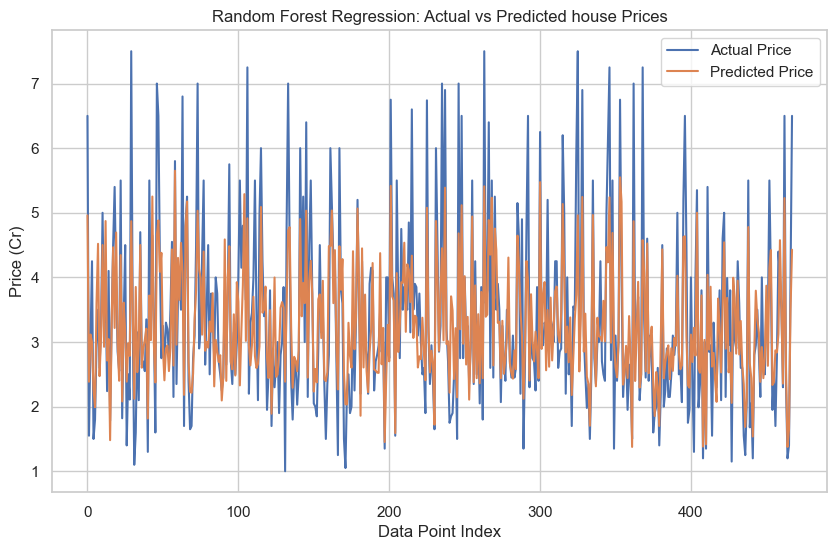

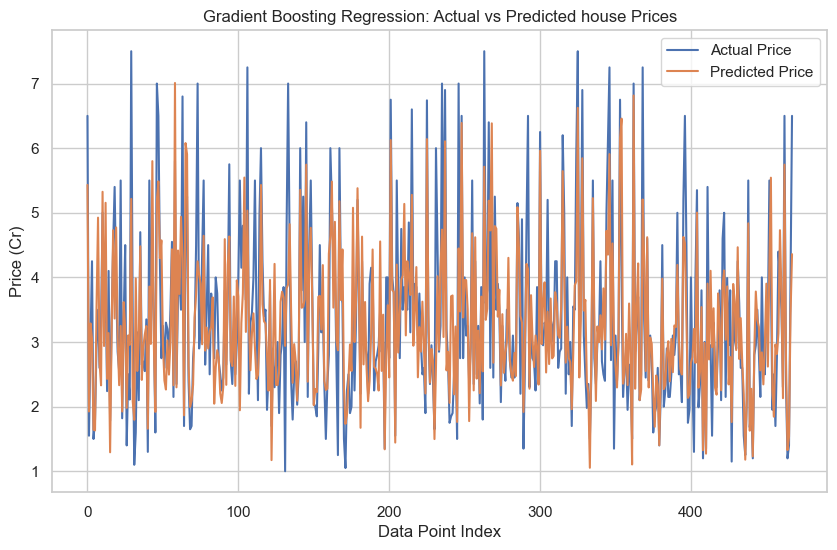

In [263]:
import matplotlib.pyplot as plt

# ---------------------------
# Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_lr, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Price (Cr)')
plt.ylabel('Predicted Price (Cr)')
plt.title('Linear Regression: Actual vs Predicted house Prices')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.values, label='Actual Price')
plt.plot(y_pred_rf, label='Predicted Price')
plt.xlabel('Data Point Index')
plt.ylabel('Price (Cr)')
plt.title('Random Forest Regression: Actual vs Predicted house Prices')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Gradient Boosting
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.values, label='Actual Price')
plt.plot(y_pred_gb, label='Predicted Price')
plt.xlabel('Data Point Index')
plt.ylabel('Price (Cr)')
plt.title('Gradient Boosting Regression: Actual vs Predicted house Prices')
plt.legend()
plt.grid(True)
plt.show()


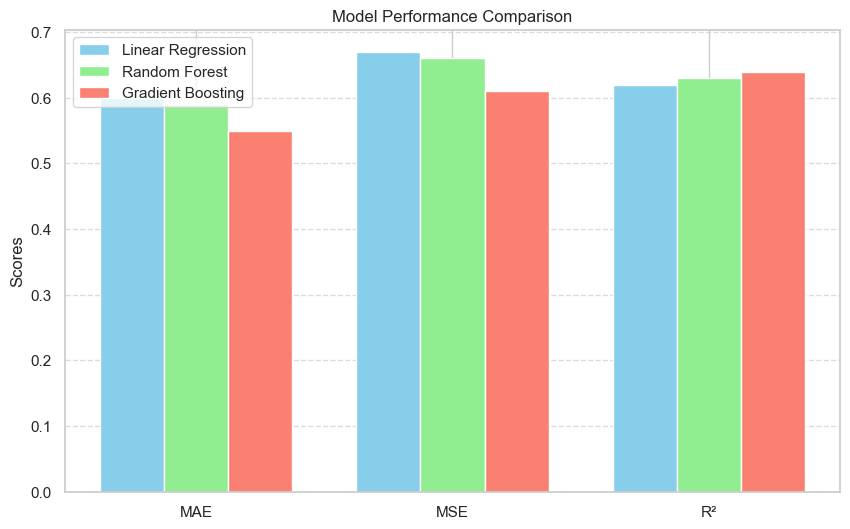

In [268]:
import matplotlib.pyplot as plt

# Metrics and their scores
metrics = ['MAE', 'MSE', 'R²']
linear_metrics = [0.60, 0.67, 0.62]        # Replace with your Linear Regression metrics
rf_metrics = [0.59, 0.66, 0.63]            # Replace with your Random Forest metrics
gb_metrics = [0.55, 0.61, 0.64]            # Replace with your Gradient Boosting metrics

# Bar Plot
x = range(len(metrics))
plt.figure(figsize=(10, 6))

plt.bar(x, linear_metrics, width=0.25, label='Linear Regression', color='skyblue', align='center')
plt.bar([i + 0.25 for i in x], rf_metrics, width=0.25, label='Random Forest', color='lightgreen', align='center')
plt.bar([i + 0.5 for i in x], gb_metrics, width=0.25, label='Gradient Boosting', color='salmon', align='center')

plt.xticks([i + 0.25 for i in x], metrics)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [269]:
clean_data

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,2.90,4.0,12.0,6,1,False,False,False,False,True
1,4.5,5.0,6.0,4.75,3.0,10.0,6,2,False,False,False,False,True
2,2.5,4.0,4.0,1.99,2.3,10.0,22,1,False,False,False,False,True
3,2.5,4.0,3.0,4.00,7.0,12.0,23,4,False,False,False,False,True
4,2.0,4.0,4.0,1.20,6.0,20.0,11,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2.60,4.5,16.0,6,1,False,False,False,True,False
3414,3.0,3.0,3.0,3.00,4.5,16.0,6,1,False,False,False,True,False
3415,2.5,4.0,2.0,1.60,4.7,16.0,10,1,False,False,False,True,False
3416,2.5,5.0,3.0,3.50,6.3,16.0,5,2,False,False,False,True,False


In [271]:
clean_data.to_csv('cleaned_data.csv', index=False)

In [272]:
clean_data

,FLOOR,BEDROOM,BATHROOM,price_in_crore,Land_in_aana,road_access_in_feet,AGE,car_parking,bhaktapur,chitwan,kaski,kathmandu,lalitpur
0,3.0,5.0,4.0,2.90,4.0,12.0,6,1,False,False,False,False,True
1,4.5,5.0,6.0,4.75,3.0,10.0,6,2,False,False,False,False,True
2,2.5,4.0,4.0,1.99,2.3,10.0,22,1,False,False,False,False,True
3,2.5,4.0,3.0,4.00,7.0,12.0,23,4,False,False,False,False,True
4,2.0,4.0,4.0,1.20,6.0,20.0,11,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2.5,4.0,4.0,2.60,4.5,16.0,6,1,False,False,False,True,False
3414,3.0,3.0,3.0,3.00,4.5,16.0,6,1,False,False,False,True,False
3415,2.5,4.0,2.0,1.60,4.7,16.0,10,1,False,False,False,True,False
3416,2.5,5.0,3.0,3.50,6.3,16.0,5,2,False,False,False,True,False
